In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from itertools import combinations
from itertools import product


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy






In [6]:
data = pd.read_csv("StudentPerformanceFactors.csv")
data

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Distance_from_Home,Gender,Exam_Score
0,23,84,High,7,73,Low,Yes,0,Low,Public,Positive,3,Near,Male,67
1,19,64,Medium,8,59,Low,Yes,2,Medium,Public,Negative,4,Moderate,Female,61
2,24,98,Medium,7,91,Medium,Yes,2,Medium,Public,Neutral,4,Near,Male,74
3,29,89,Medium,8,98,Medium,Yes,1,Medium,Public,Negative,4,Moderate,Male,71
4,19,92,Medium,6,65,Medium,Yes,3,Medium,Public,Neutral,4,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6603,25,69,Medium,7,76,Medium,Yes,1,High,Public,Positive,2,Near,Female,68
6604,23,76,Medium,8,81,Medium,Yes,3,Low,Public,Positive,2,Near,Female,69
6605,20,90,Low,6,65,Low,Yes,3,Low,Public,Negative,2,Near,Female,68
6606,10,86,High,6,91,High,Yes,2,Low,Private,Positive,3,Far,Female,68


In [7]:
#Lets check for duplicates 
data.duplicated().sum()

1

In [8]:
#lets remove the duplicates 
data.drop_duplicates(inplace=True) #inplace=True modifies the original dataframe

In [9]:
#Lets check for null/nan/missing values in the data 
data.isnull().sum()

Hours_Studied           0
Attendance              0
Access_to_Resources     0
Sleep_Hours             0
Previous_Scores         0
Motivation_Level        0
Internet_Access         0
Tutoring_Sessions       0
Family_Income           0
School_Type             0
Peer_Influence          0
Physical_Activity       0
Distance_from_Home     67
Gender                  0
Exam_Score              0
dtype: int64

##### So , only one column i.e. Distance_from_Home has missing values .

In [10]:
data.shape


(6607, 15)

In [11]:
data.nunique()

Hours_Studied          41
Attendance             41
Access_to_Resources     3
Sleep_Hours             7
Previous_Scores        51
Motivation_Level        3
Internet_Access         2
Tutoring_Sessions       9
Family_Income           3
School_Type             2
Peer_Influence          3
Physical_Activity       7
Distance_from_Home      3
Gender                  2
Exam_Score             45
dtype: int64

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6607 entries, 0 to 6607
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hours_Studied        6607 non-null   int64 
 1   Attendance           6607 non-null   int64 
 2   Access_to_Resources  6607 non-null   object
 3   Sleep_Hours          6607 non-null   int64 
 4   Previous_Scores      6607 non-null   int64 
 5   Motivation_Level     6607 non-null   object
 6   Internet_Access      6607 non-null   object
 7   Tutoring_Sessions    6607 non-null   int64 
 8   Family_Income        6607 non-null   object
 9   School_Type          6607 non-null   object
 10  Peer_Influence       6607 non-null   object
 11  Physical_Activity    6607 non-null   int64 
 12  Distance_from_Home   6540 non-null   object
 13  Gender               6607 non-null   object
 14  Exam_Score           6607 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 825.9+ KB


In [13]:
data.describe() # prints the statistics of the numerical columns in the data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


<h1>UNIVARIATE ANALYSIS :</h1>

In [14]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Access_to_Resources', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Distance_from_Home', 'Gender', 'Exam_Score'],
      dtype='object')

In [15]:
num_cols = [col for col in data.columns if data[col].dtypes=="int64" or  data[col].dtypes=="float64"]
num_cols

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

## Numerical Columns Analysis :

1. Hours_Studied

In [16]:
data["Hours_Studied"].value_counts()

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
6      17
4      17
3      12
36     11
38      7
39      7
37      6
2       6
1       3
43      1
44      1
Name: count, dtype: int64

Since , there are many possible values of hours studied , we will plot a histogram with bin size = 20

<Axes: xlabel='Hours_Studied', ylabel='Count'>

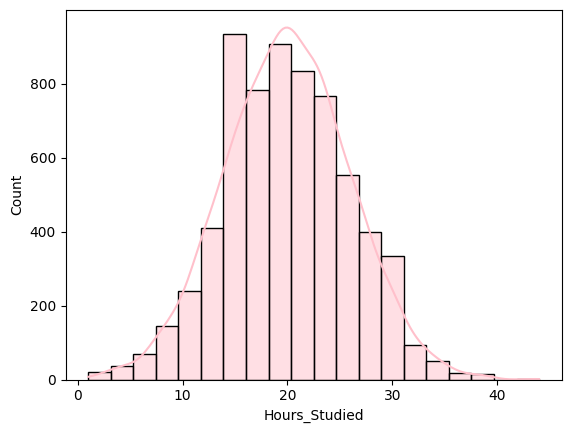

In [17]:
sns.histplot(data=data,x="Hours_Studied",bins=20,color="pink",kde=True)

We can observe from the above histogram that graph is approximately normally distributed with peak around 16 hours .

2. Attendance

<Axes: xlabel='Attendance', ylabel='Count'>

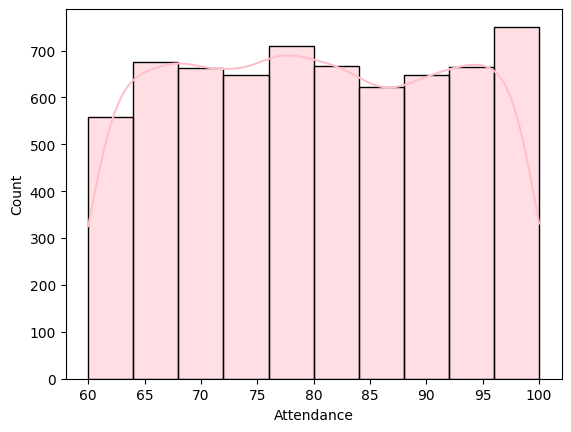

In [18]:
sns.histplot(data=data,x="Attendance",bins=10,color="pink",kde=True)

We can observe a variety in attendance of students ranging from 60 to 100 and there is no particular bin with a big difference.

3. Sleep_Hours

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

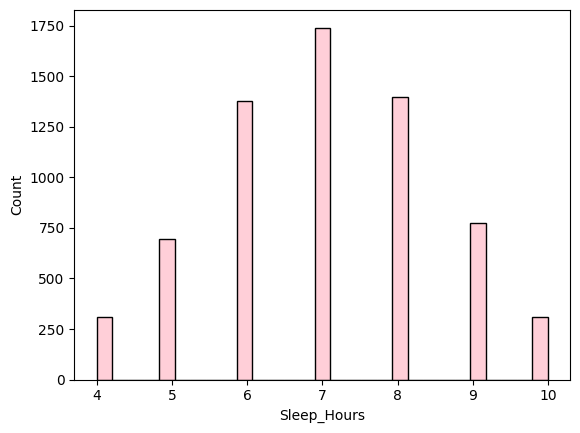

In [19]:
sns.histplot(data=data,x="Sleep_Hours",color="pink")

Since , there are only 7 outcomes of Sleep_Hours , therefore , i am plotting a bar graph instead of histogram .
From the graph , it can be observed that it is normally distributed with peak around 7 hours .

4. Previous_Scores

<Axes: xlabel='Previous_Scores', ylabel='Count'>

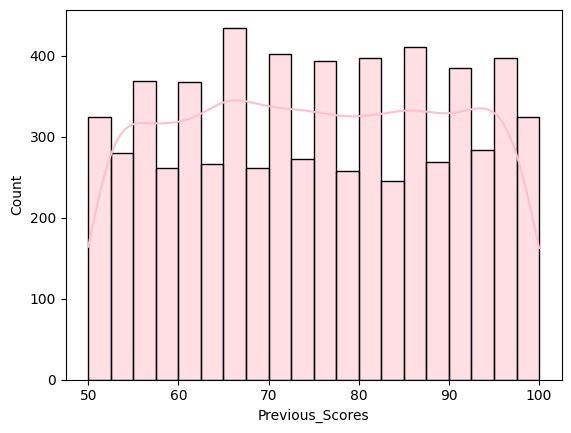

In [20]:
sns.histplot(data=data,x="Previous_Scores",bins=20,color="pink",kde=True)

Previous scores are highly fluctuating in nature and hence indicates the variety in previous scores of the studnets

5. Tutoring_Sessions 

<Axes: xlabel='Tutoring_Sessions', ylabel='Count'>

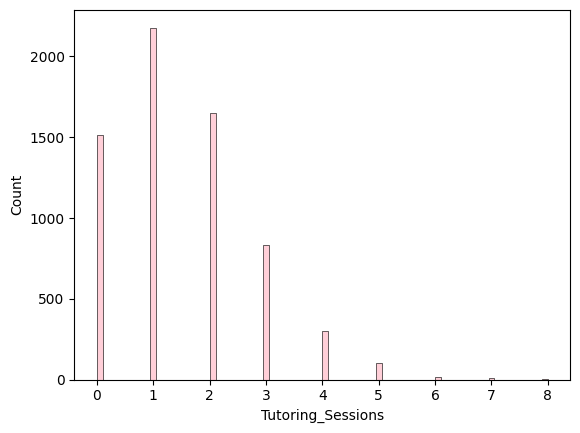

In [21]:
sns.histplot(data=data,x="Tutoring_Sessions",color="pink", )

It can be observed that graph is right-skewed and peak lies at 1 tutoring session . 

6. Physical_Activity 

<Axes: xlabel='Physical_Activity', ylabel='Count'>

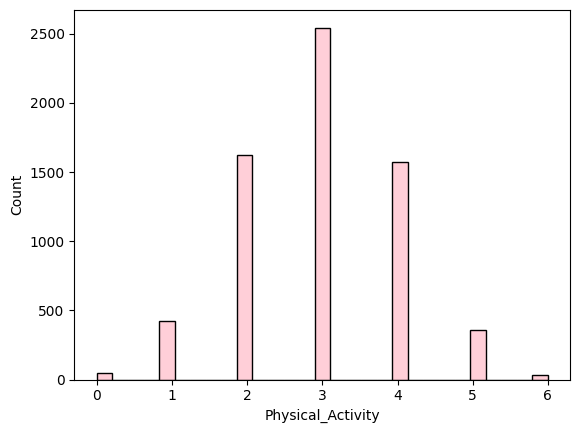

In [22]:
sns.histplot(data=data,x="Physical_Activity",color="pink")

The graph is normally distributed with peak lying at 3 days a week .

7.  Exam_Score

<Axes: xlabel='Exam_Score', ylabel='Count'>

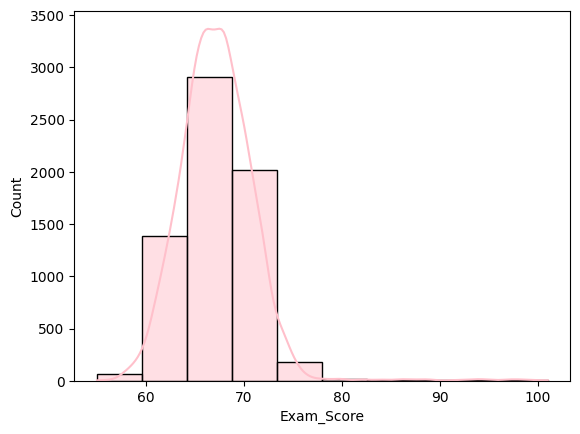

In [23]:
sns.histplot(data=data,x="Exam_Score", bins=10,color="pink",kde = True )

The graph is heavily skewed towards right and peak lies near 65 .

## Categorical Column Analysis :

In [24]:
cat_cols = [col for col in data.columns if data[col].dtypes=="object"]
cat_cols

['Access_to_Resources',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'School_Type',
 'Peer_Influence',
 'Distance_from_Home',
 'Gender']

1. Access_to_Resources

<Axes: xlabel='Access_to_Resources', ylabel='count'>

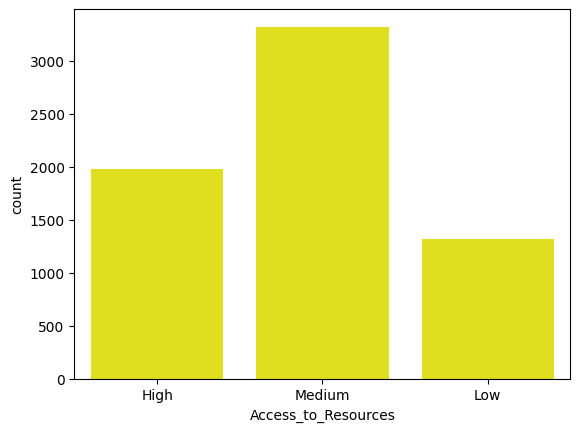

In [25]:
sns.countplot(data=data,x="Access_to_Resources",color="yellow")

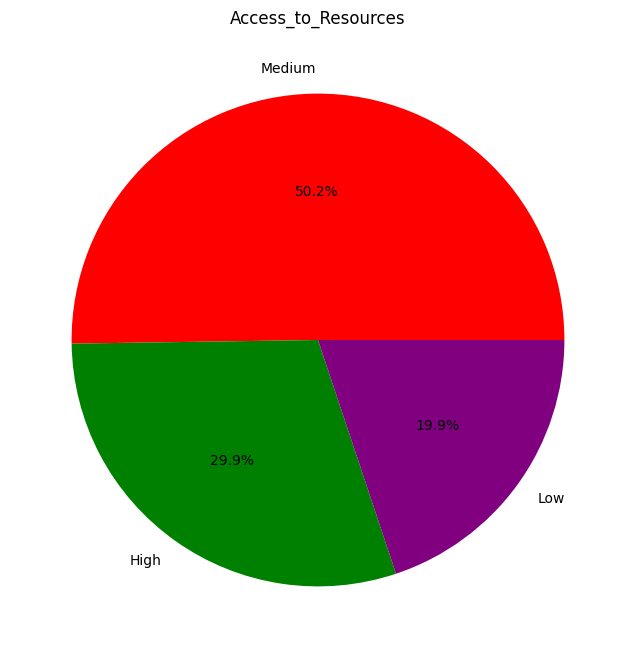

In [26]:
counts = data["Access_to_Resources"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green","purple"])
plt.title('Access_to_Resources')
plt.show()

Majority students have access to medium level of resources.

2. Motivation_Level :

<Axes: xlabel='Motivation_Level', ylabel='count'>

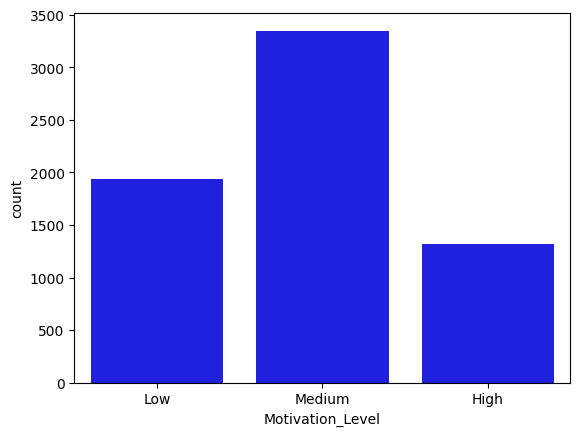

In [27]:
sns.countplot(data=data,x="Motivation_Level",color="blue")

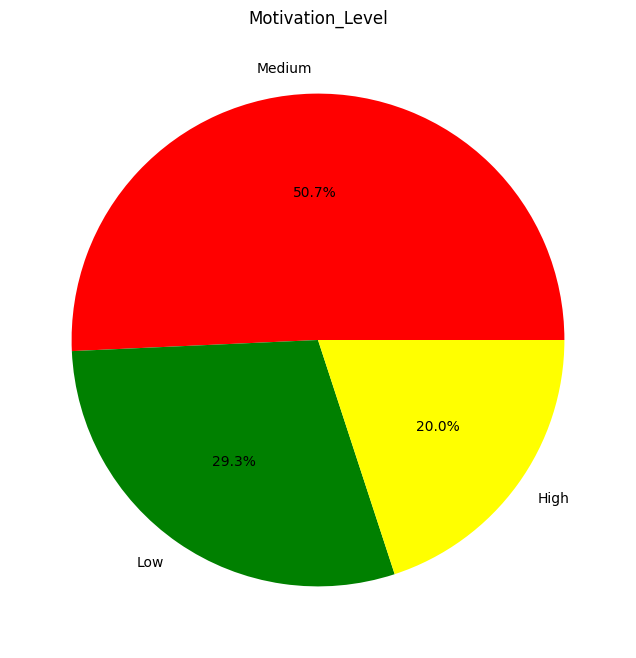

In [28]:
counts = data["Motivation_Level"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green","yellow"])
plt.title('Motivation_Level')
plt.show()

3. Internet_Access

<Axes: xlabel='Internet_Access', ylabel='count'>

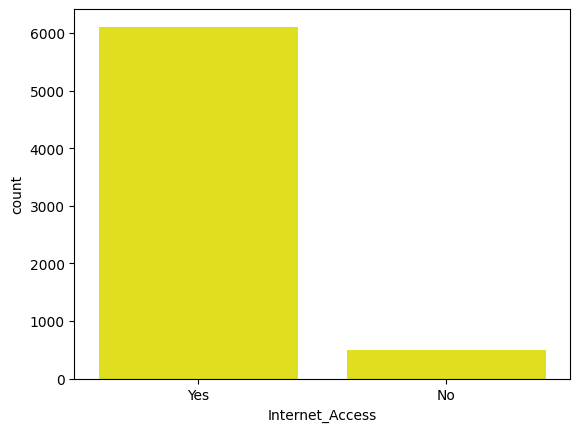

In [29]:
sns.countplot(data=data,x="Internet_Access",color="yellow")

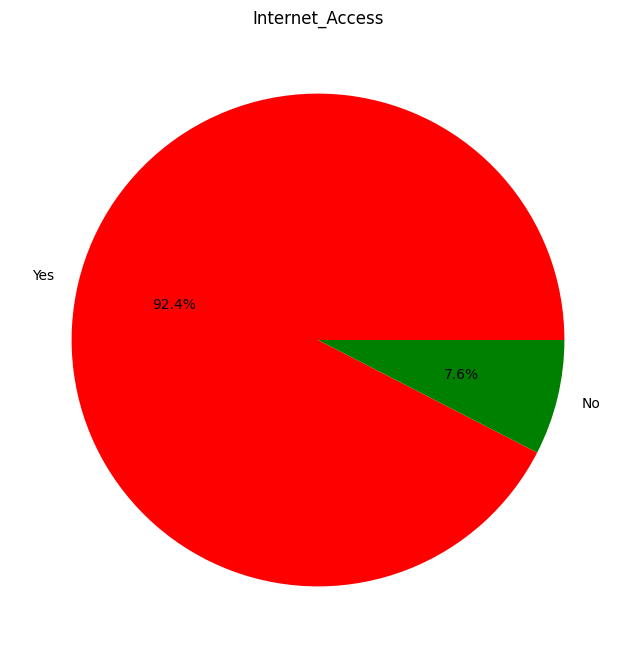

In [30]:
counts = data["Internet_Access"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green"])
plt.title('Internet_Access')
plt.show()

Almost 93% students have access to internet , which can be expected but there still exists around 7% students with no access to internet

4. Family_Income

<Axes: xlabel='Family_Income', ylabel='count'>

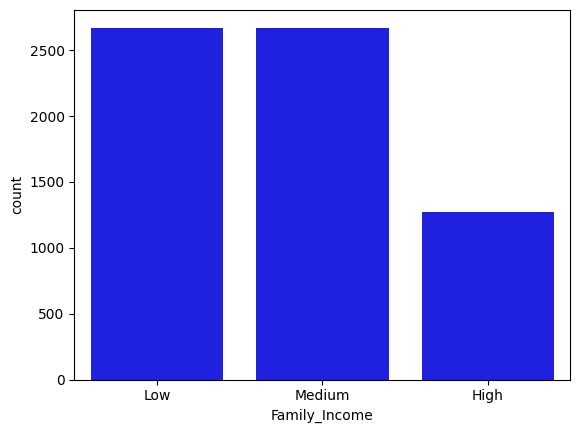

In [31]:
sns.countplot(data=data,x="Family_Income",color="blue")

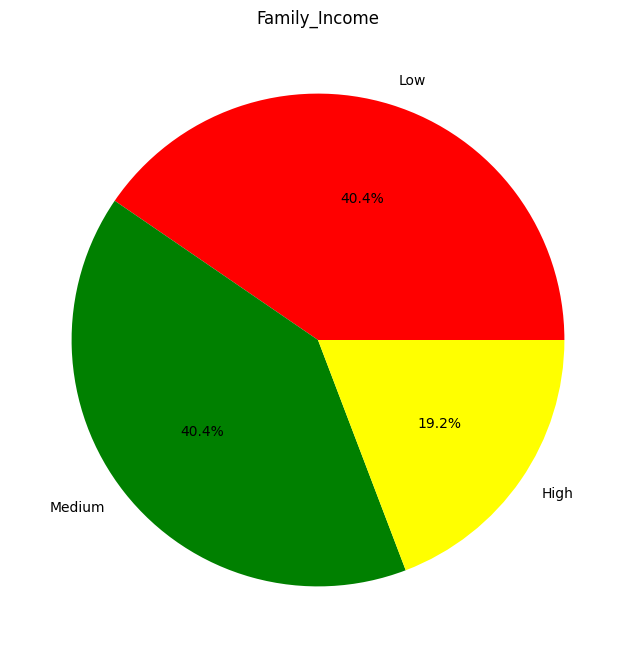

In [32]:
counts = data["Family_Income"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green","yellow"])
plt.title('Family_Income')
plt.show()

Most of students' family income is on the lower and medium side , while approximately 19% students are from high earning family.

5. School_Type

<Axes: xlabel='School_Type', ylabel='count'>

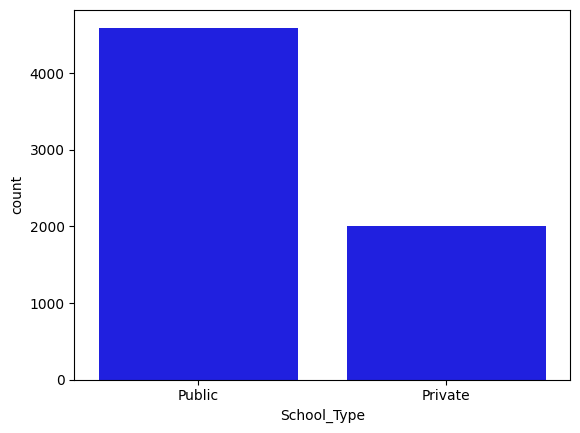

In [33]:
sns.countplot(data=data,x="School_Type",color="blue")

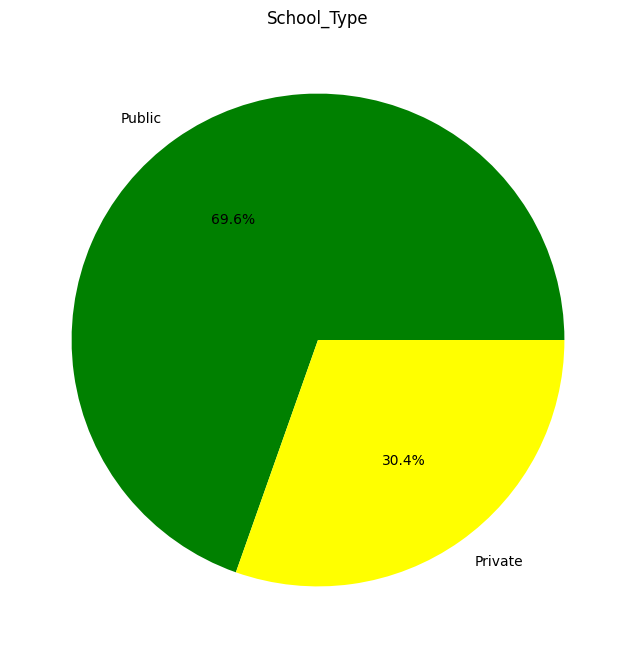

In [34]:
counts = data["School_Type"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=[ "green","yellow"])
plt.title('School_Type')
plt.show()

Majority students are from public schools .

6. Peer_Influence

<Axes: xlabel='Peer_Influence', ylabel='count'>

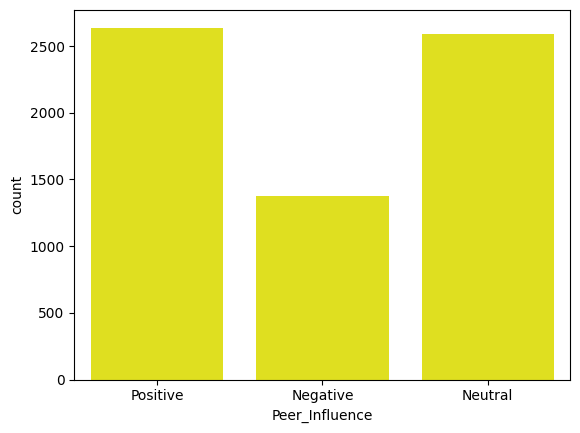

In [35]:
sns.countplot(data=data,x="Peer_Influence",color="yellow")

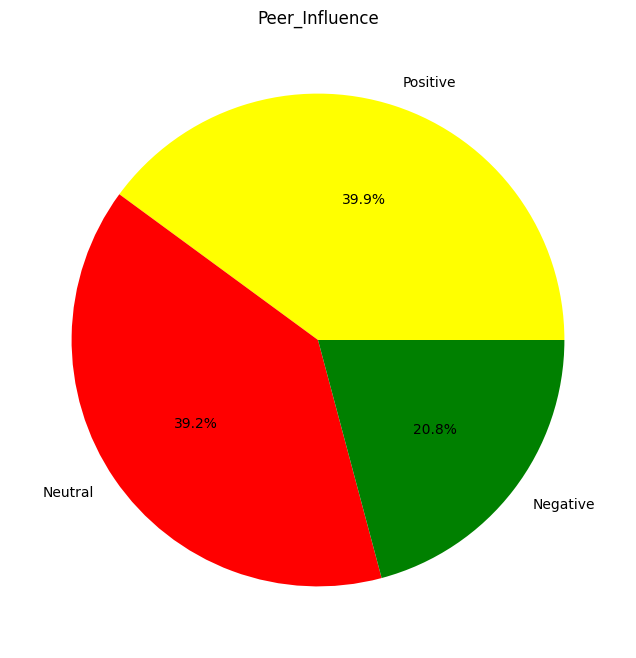

In [36]:
counts = data["Peer_Influence"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["yellow","red", "green"])
plt.title('Peer_Influence')
plt.show()

Majority students have either positive or neutral influence from peers , 
while there still exists around 20% students with negative influence from peers.

7. Distance_from_Home

<Axes: xlabel='Distance_from_Home', ylabel='count'>

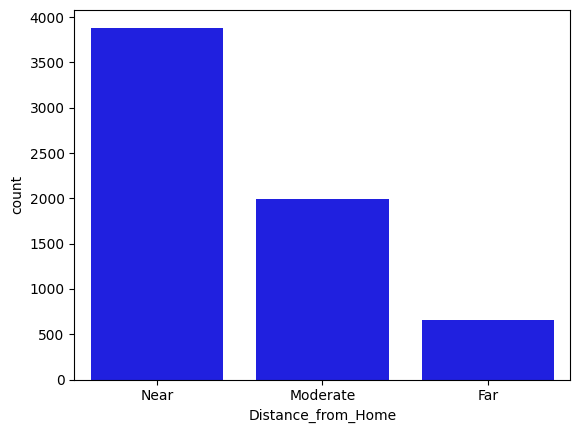

In [37]:
sns.countplot(data=data,x="Distance_from_Home",color="blue")

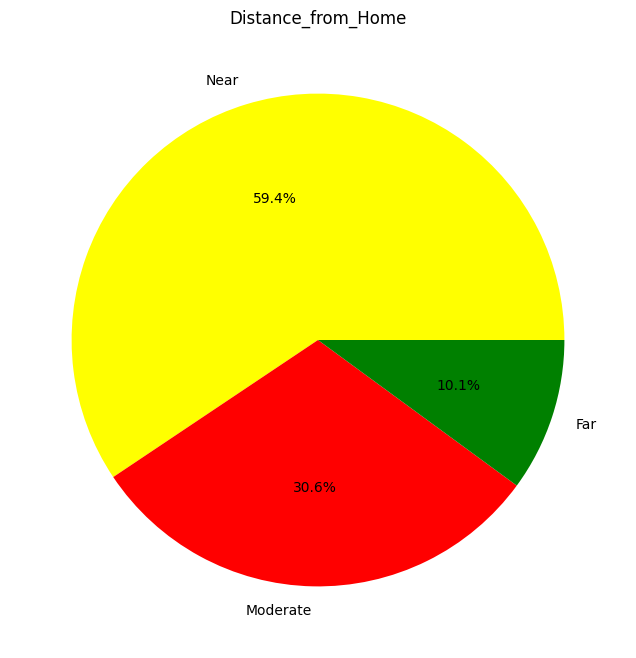

In [38]:
counts = data["Distance_from_Home"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["yellow","red", "green"])
plt.title('Distance_from_Home')
plt.show()

Majority of students live near to school.

8. Gender

<Axes: xlabel='Gender', ylabel='count'>

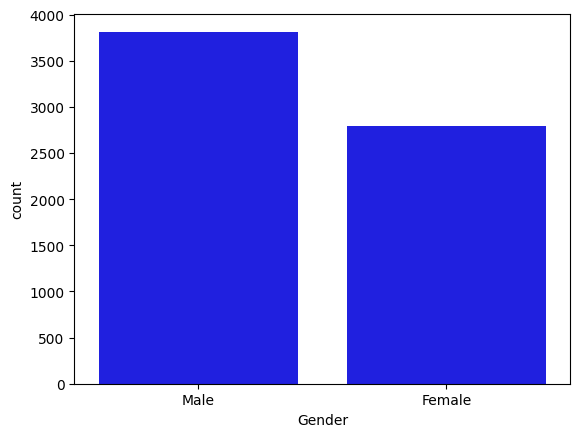

In [39]:
sns.countplot(data=data,x="Gender",color="blue")

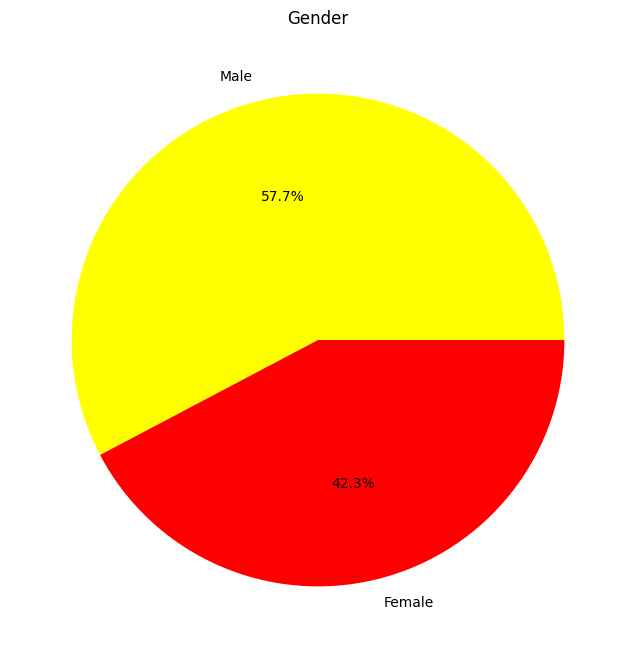

In [40]:
counts = data["Gender"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["yellow","red", "green"])
plt.title('Gender')
plt.show()

No. of Males are more than 50%

## Here we have completed analysis of individual columns. Based on this , now lets fill the null values in our dataset .

For the "Distance_from_Home" column, lets use the mode(Near) for filling the missing values beacuse its categorical data mean, median doesnt make sense and also Near class is largely dominant over the other two classes i.e Moderate and Far .

In [41]:
mode = data['Distance_from_Home'].mode()[0]
data['Distance_from_Home'] = data['Distance_from_Home'].fillna(mode)

In [42]:
data.isnull().sum()

Hours_Studied          0
Attendance             0
Access_to_Resources    0
Sleep_Hours            0
Previous_Scores        0
Motivation_Level       0
Internet_Access        0
Tutoring_Sessions      0
Family_Income          0
School_Type            0
Peer_Influence         0
Physical_Activity      0
Distance_from_Home     0
Gender                 0
Exam_Score             0
dtype: int64

## Now we have a completed the missing value imputation part and Univariate Analysis.

# BIVARIATE ANALYSIS

## 1. Numerical and Numerical :

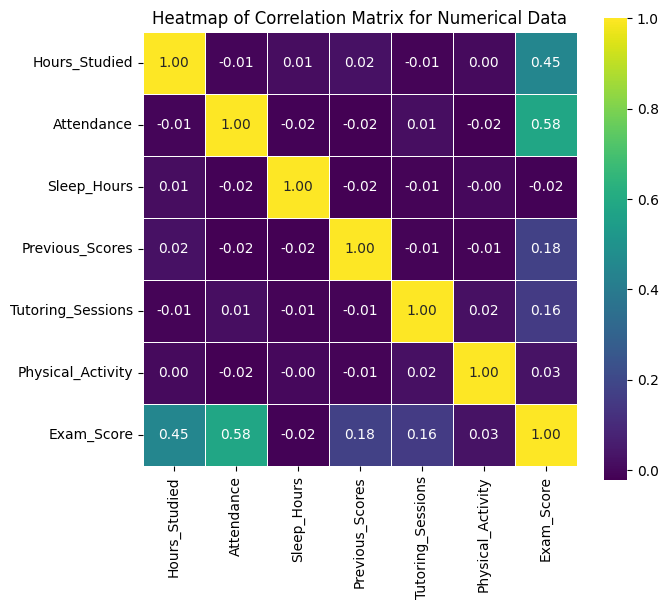

In [43]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()

#### --> From the heatmap of correlation matrix we can see that ther isn't much linear relationship between the maximum numerical columns .
####      A few things which can be inferred from the above heatmap is :
  ####    1) Attendance and Exam_Score are quite correlated  , while exam_score and hours_studied is also somewhat correlated .
  #### 2) Previous_Scores and exam_score and tutoring_session and exam_score is alo a little positively correlated. 
  ####    3) Apart from these , there are no considerable correlation between any columns .

## 2] Categorical and categorical

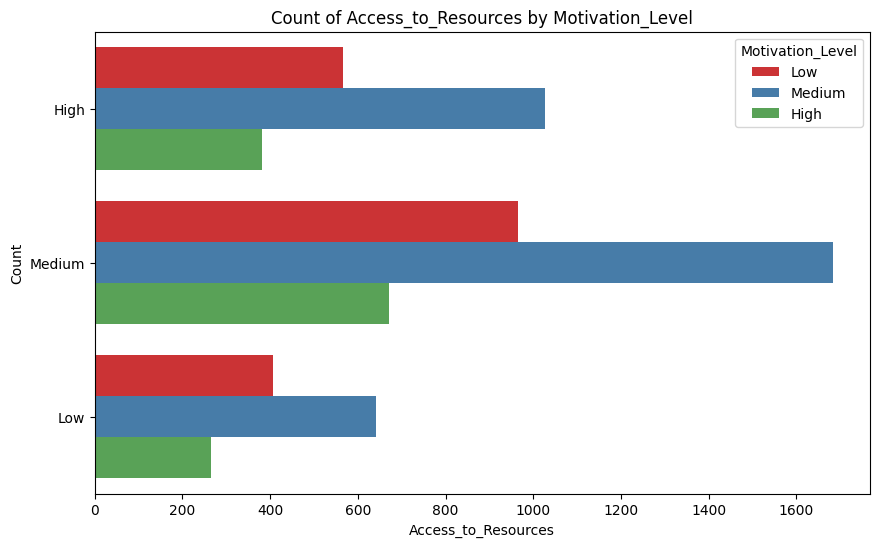

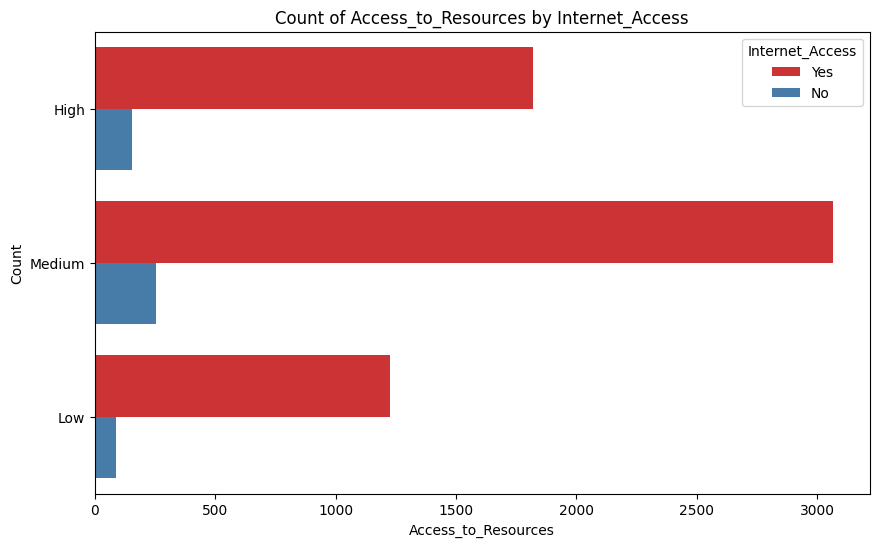

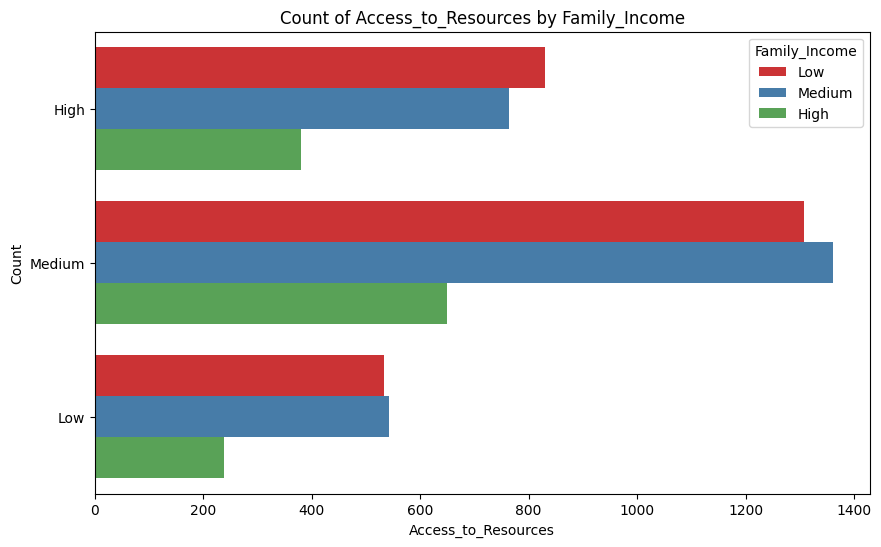

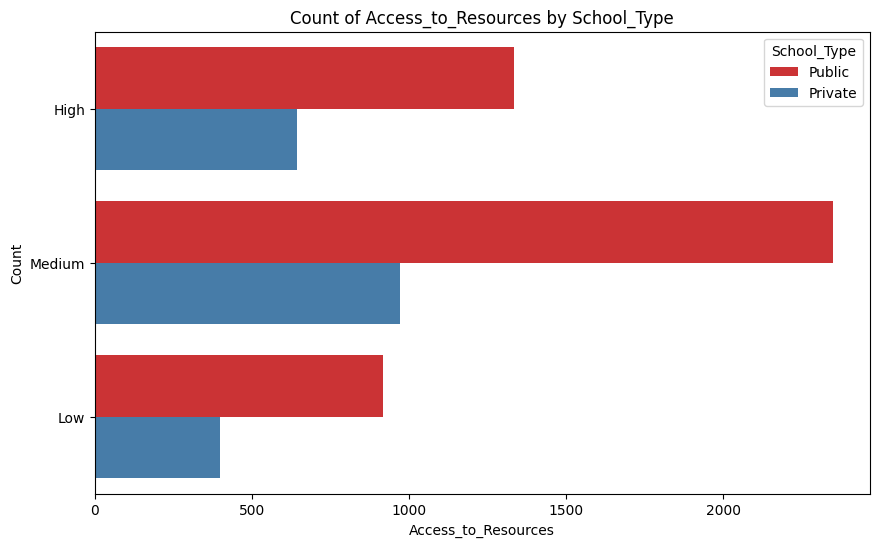

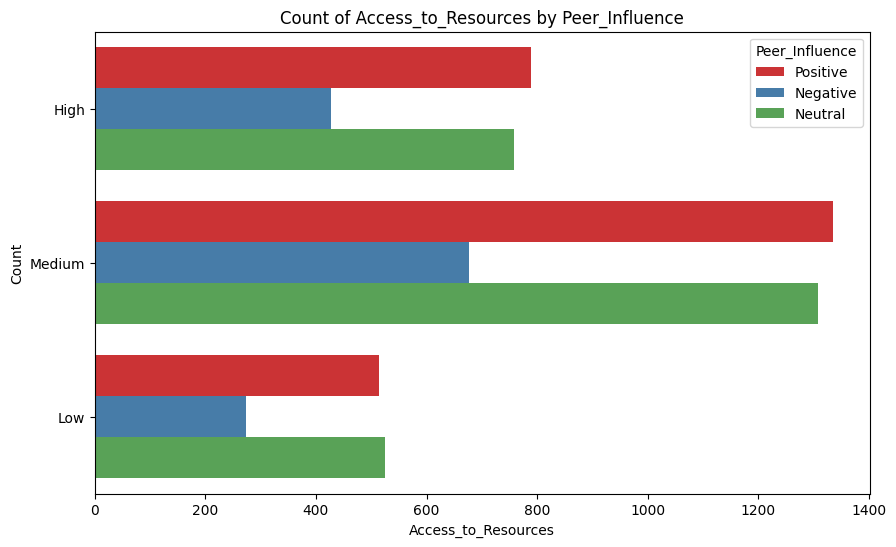

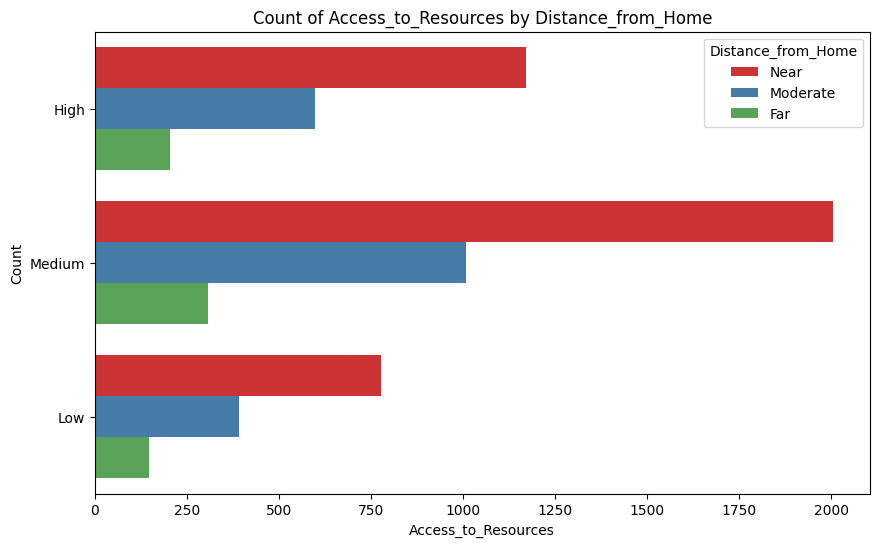

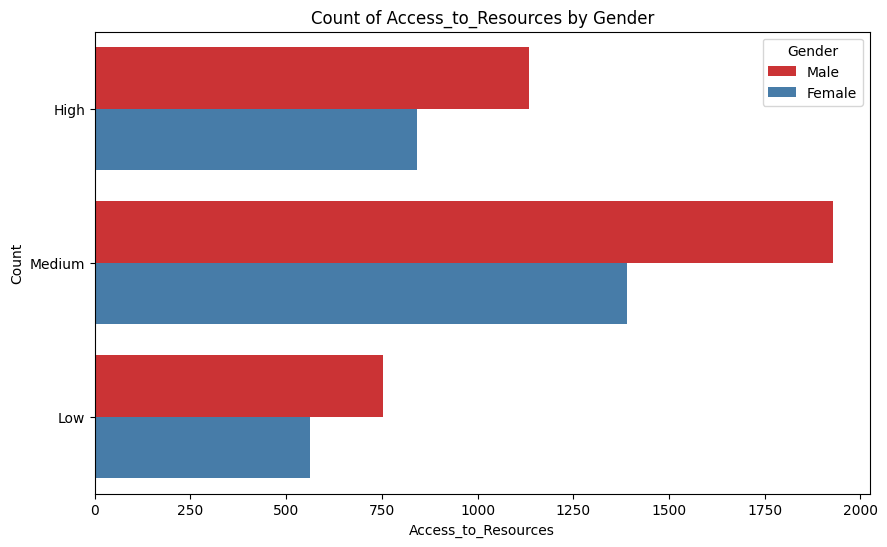

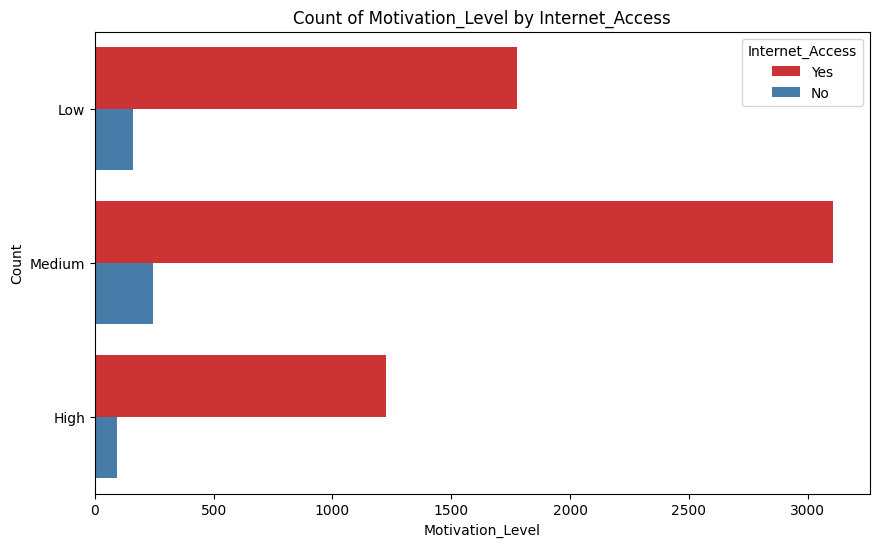

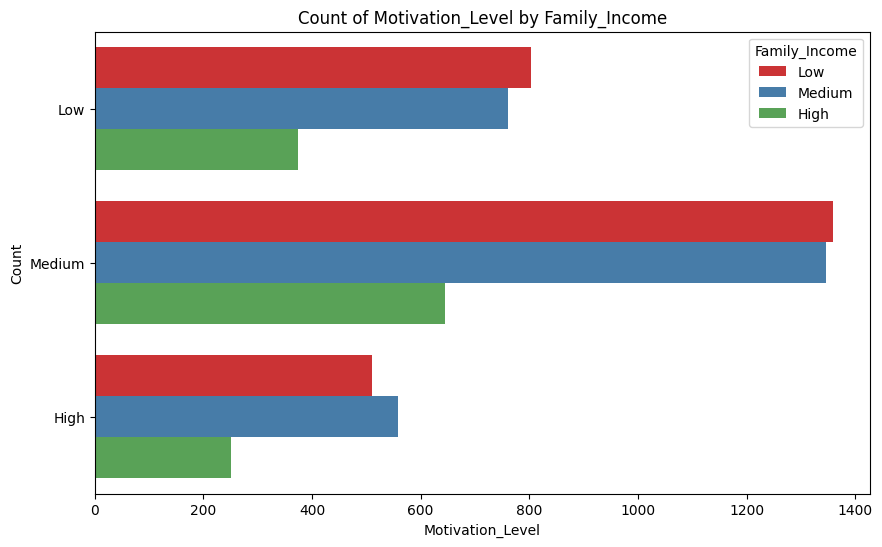

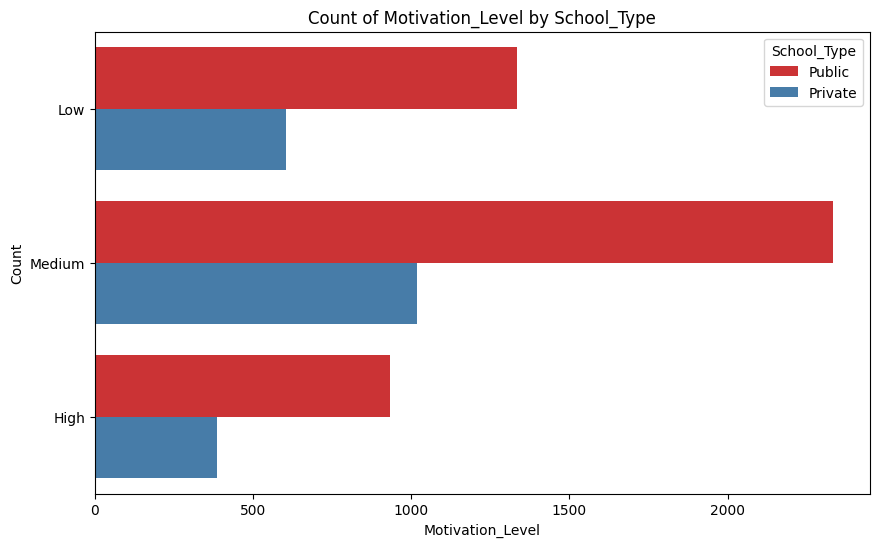

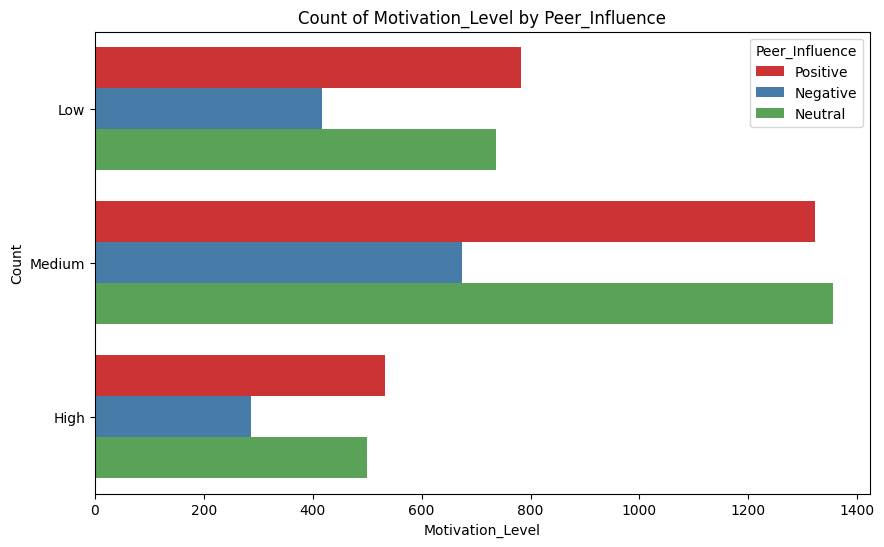

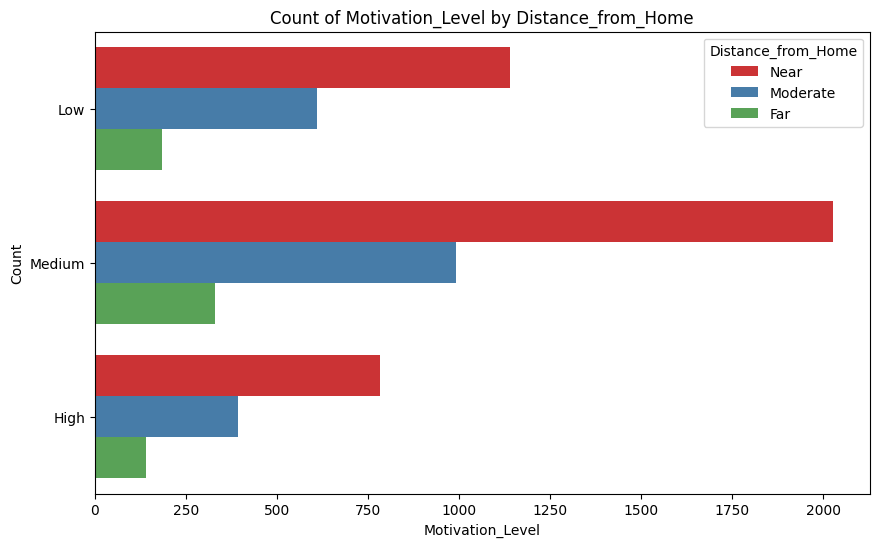

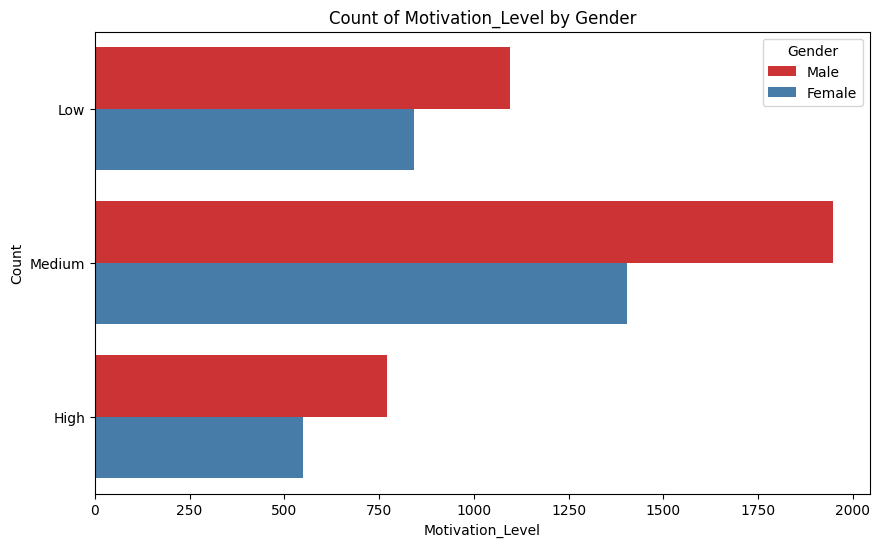

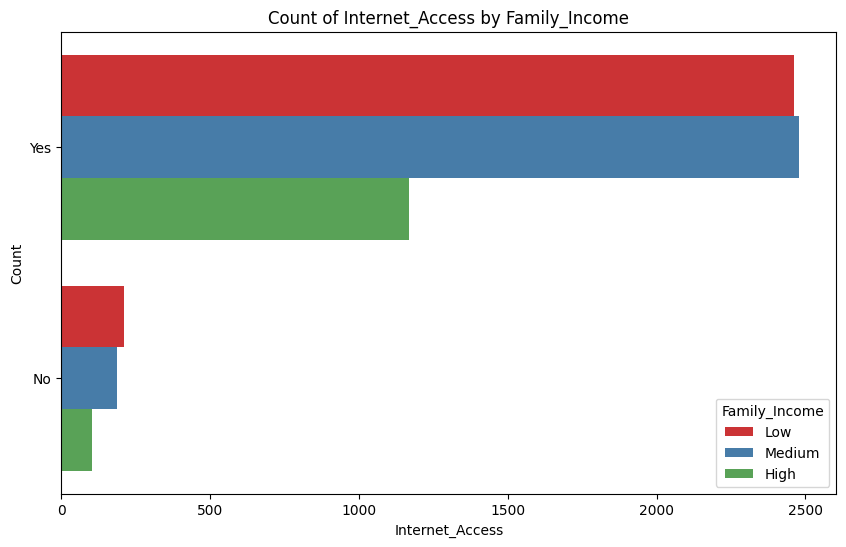

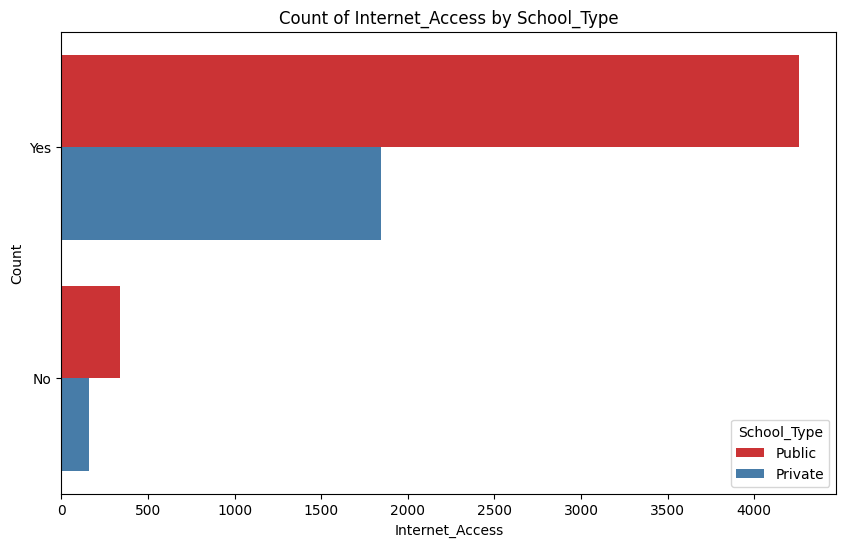

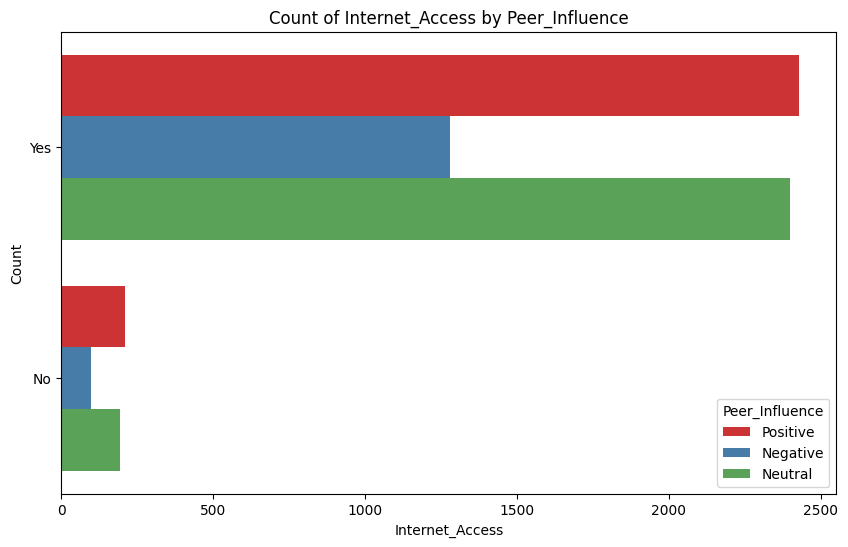

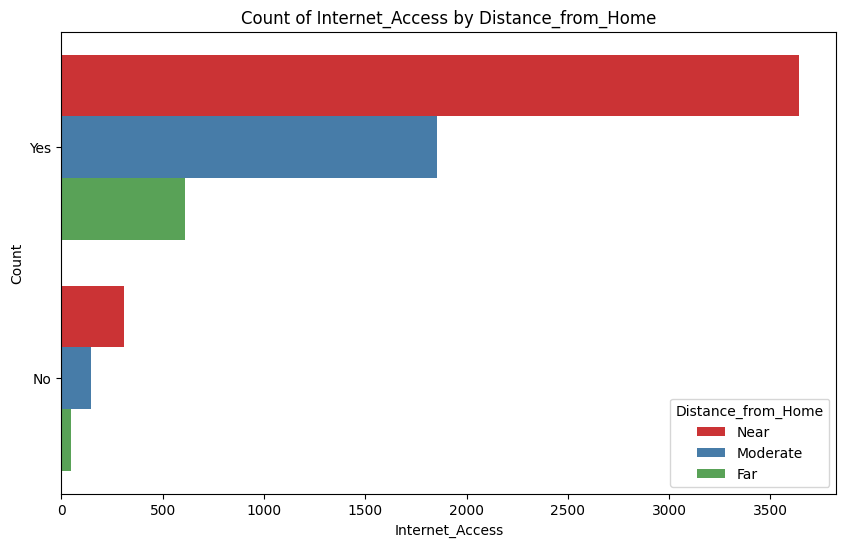

KeyboardInterrupt: 

In [44]:
cat_col = cat_cols.copy()
#cat_col.remove("region")
for col1, col2 in combinations(cat_col, 2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=col1, hue=col2, palette='Set1')
    plt.title(f'Count of {col1} by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.legend(title=col2)
    plt.show()

### We have plotted count plots for various combinations of categorical columns

In [ ]:
for col1, col2 in combinations(cat_cols, 2):
    # Create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")

Chi-Square Test between Access_to_Resources and Motivation_Level:
Chi2 Statistic: 3.7621, p-value: 0.4392, Degrees of Freedom: 4
Chi-Square Test between Access_to_Resources and Internet_Access:
Chi2 Statistic: 1.5140, p-value: 0.4691, Degrees of Freedom: 2
Chi-Square Test between Access_to_Resources and Family_Income:
Chi2 Statistic: 5.3162, p-value: 0.2564, Degrees of Freedom: 4
Chi-Square Test between Access_to_Resources and School_Type:
Chi2 Statistic: 6.3202, p-value: 0.0424, Degrees of Freedom: 2
Chi-Square Test between Access_to_Resources and Peer_Influence:
Chi2 Statistic: 1.7457, p-value: 0.7824, Degrees of Freedom: 4
Chi-Square Test between Access_to_Resources and Distance_from_Home:
Chi2 Statistic: 4.2985, p-value: 0.3671, Degrees of Freedom: 4
Chi-Square Test between Access_to_Resources and Gender:
Chi2 Statistic: 0.3671, p-value: 0.8323, Degrees of Freedom: 2
Chi-Square Test between Motivation_Level and Internet_Access:
Chi2 Statistic: 2.7338, p-value: 0.2549, Degrees of Fr

### High p-value implies there is no association between the two categorical data. 
###   From the above analysis , we can see , that there is not much correlation between many categorical columns. Though some correlation can be observed between Access_to_Resources and School_Type
### Other than this , other columns are independent .

## 3] Numerical and Categorical

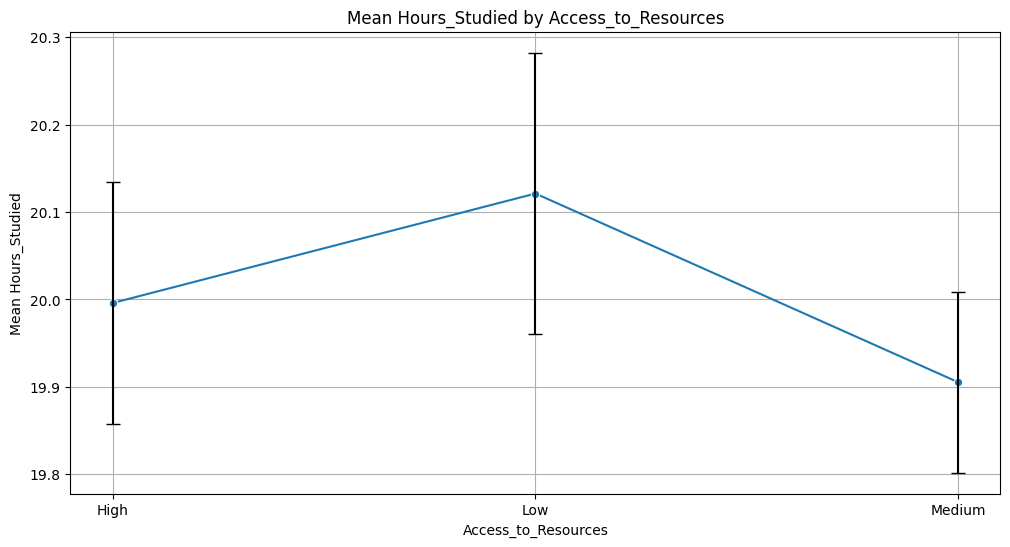

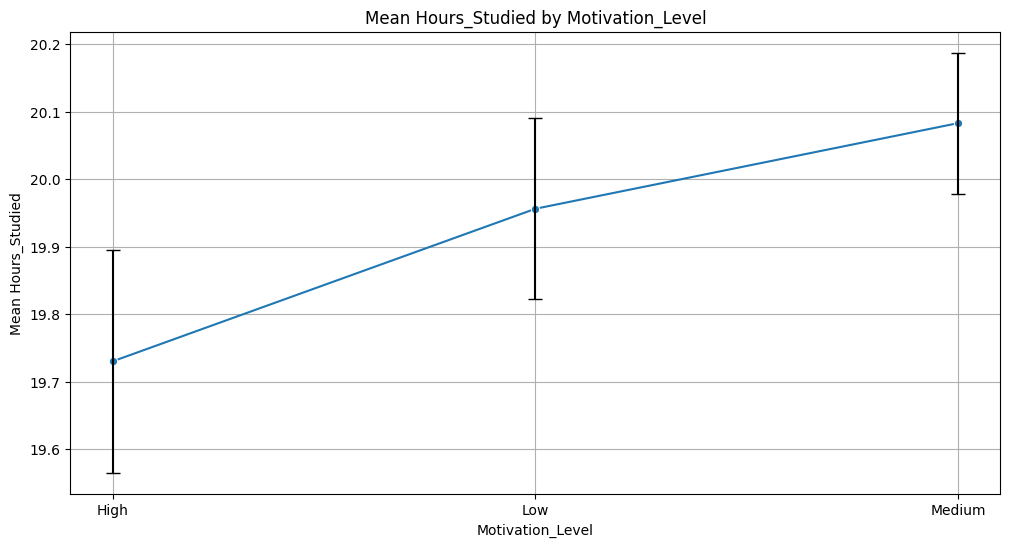

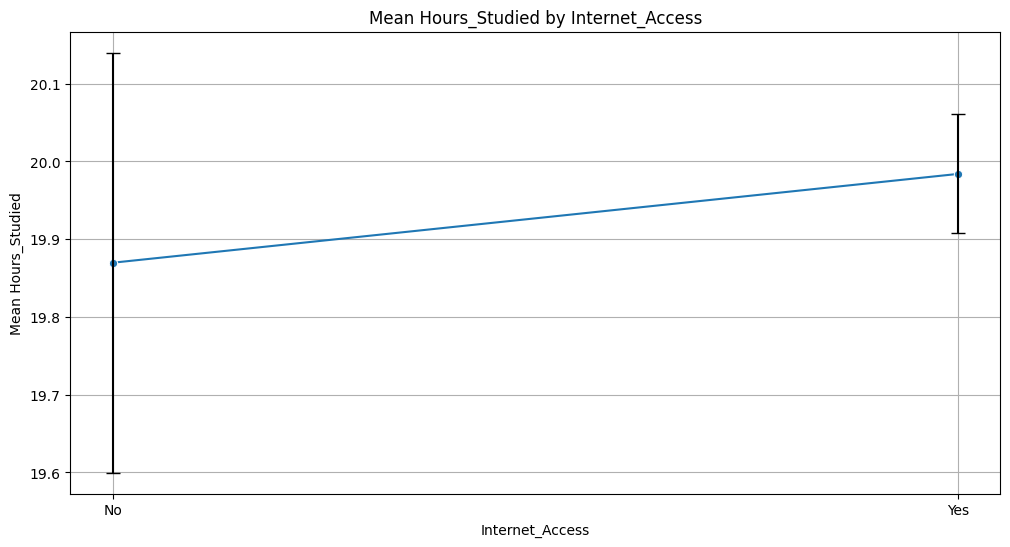

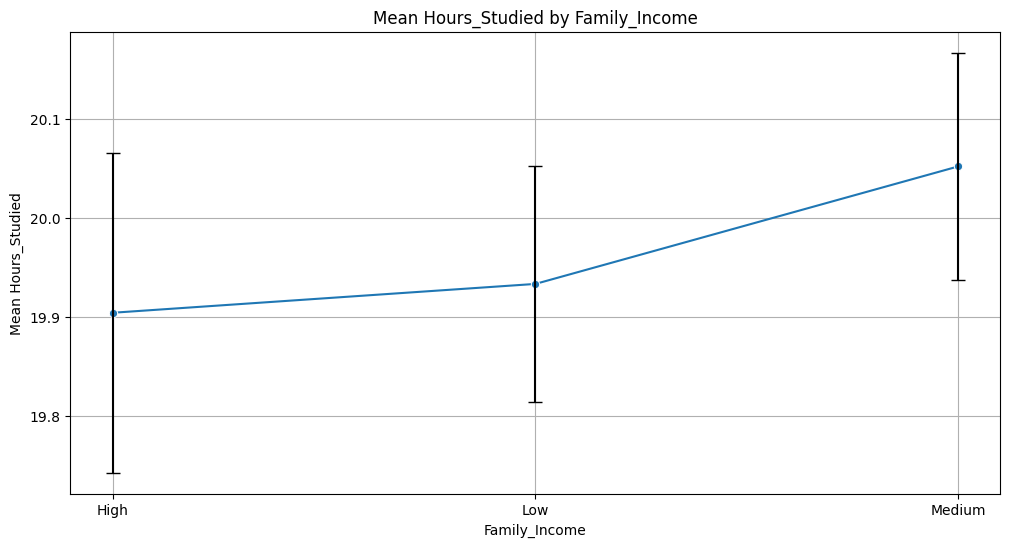

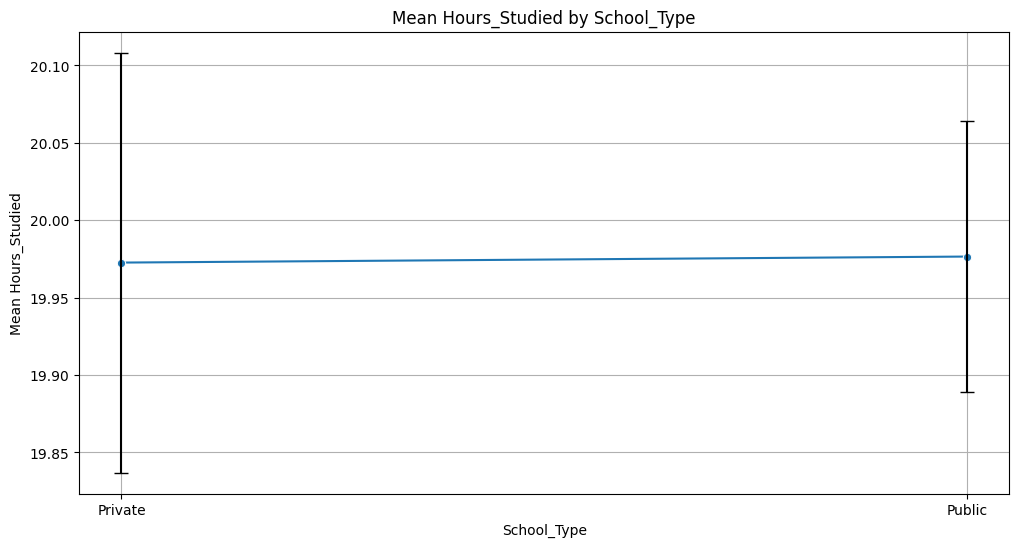

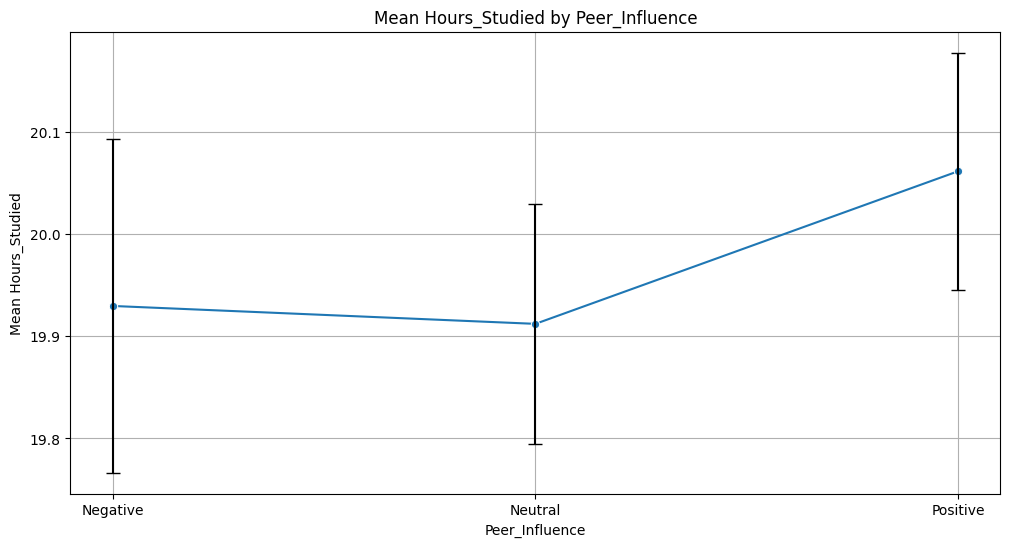

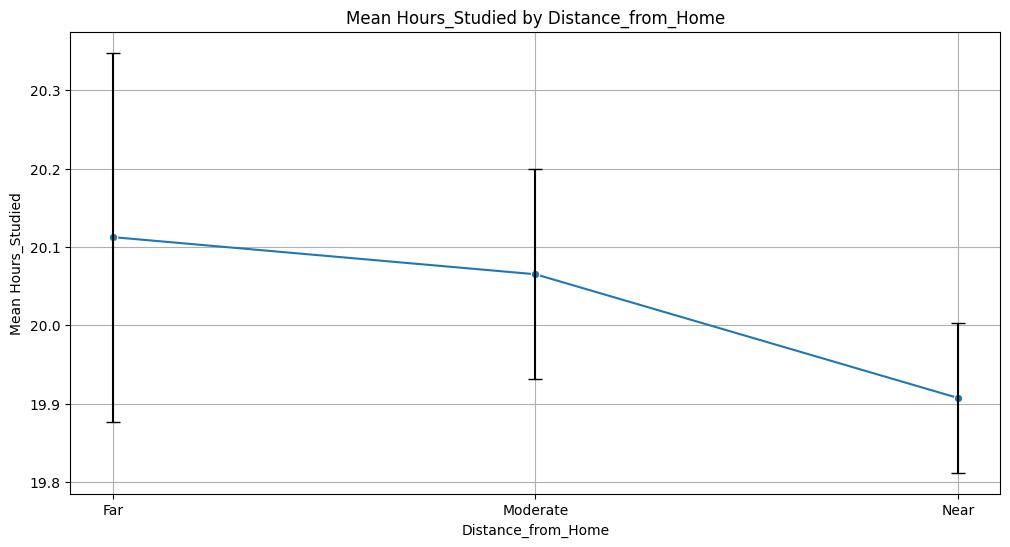

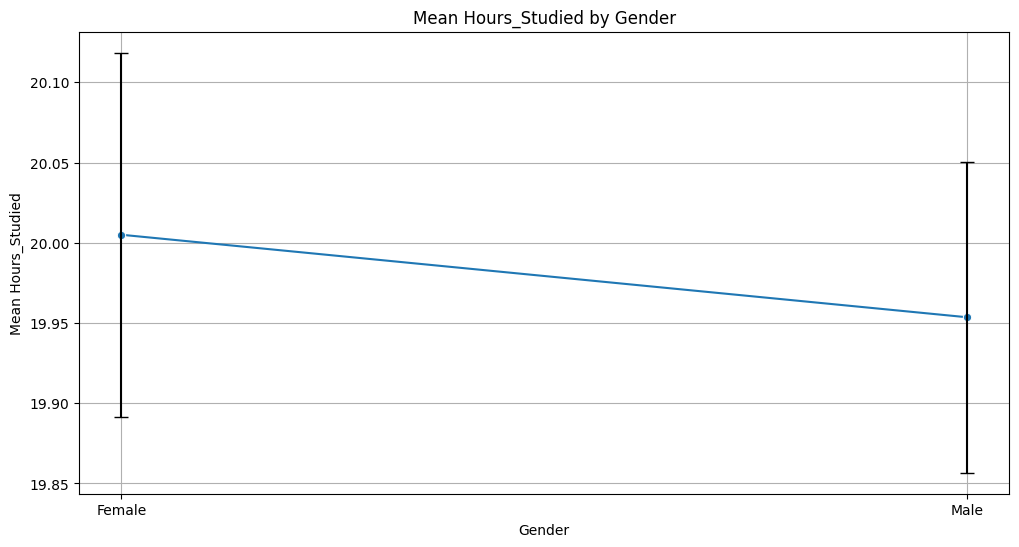

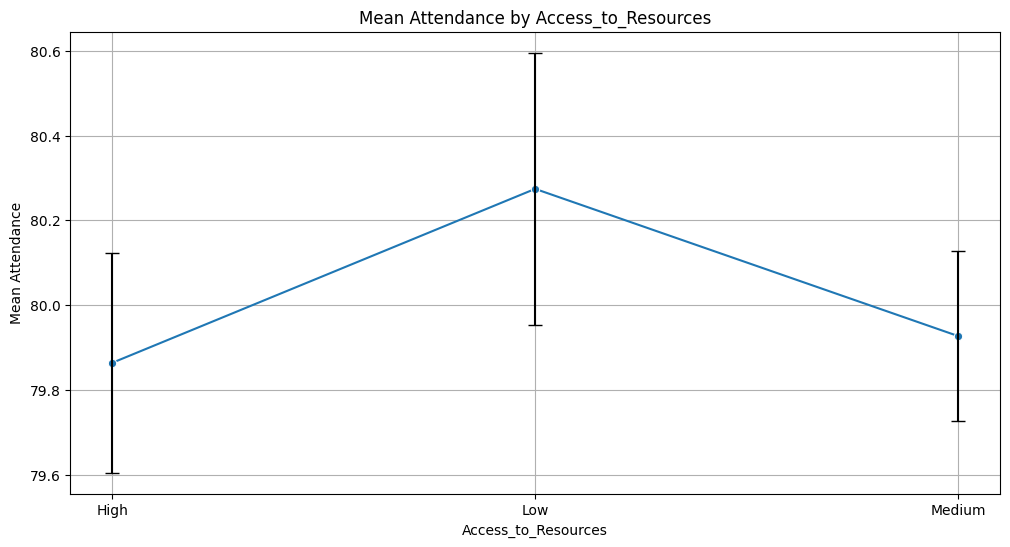

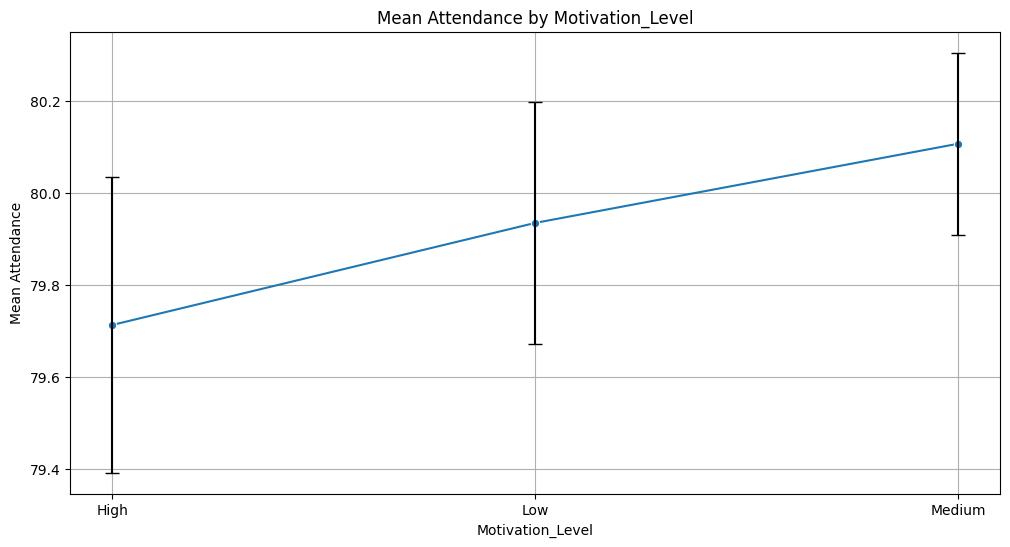

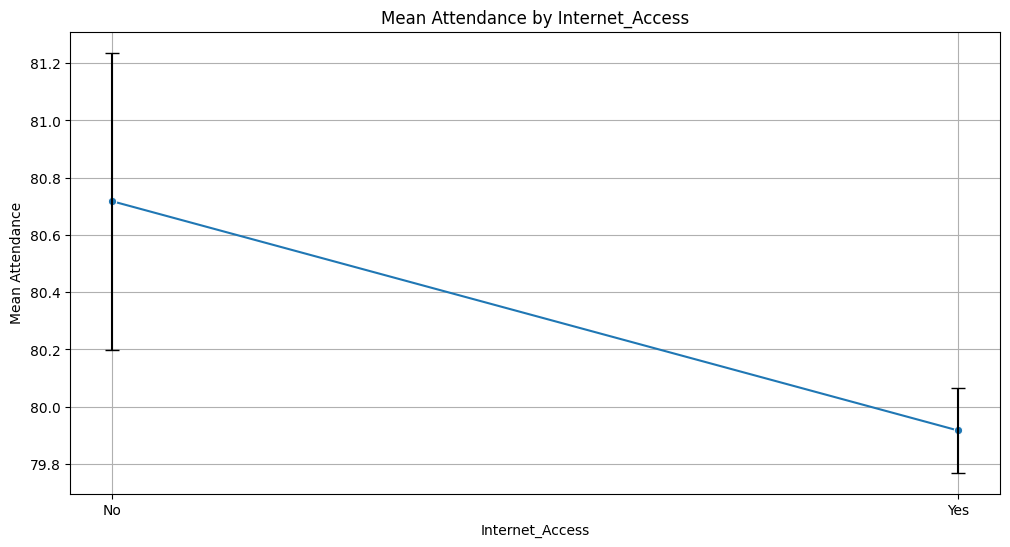

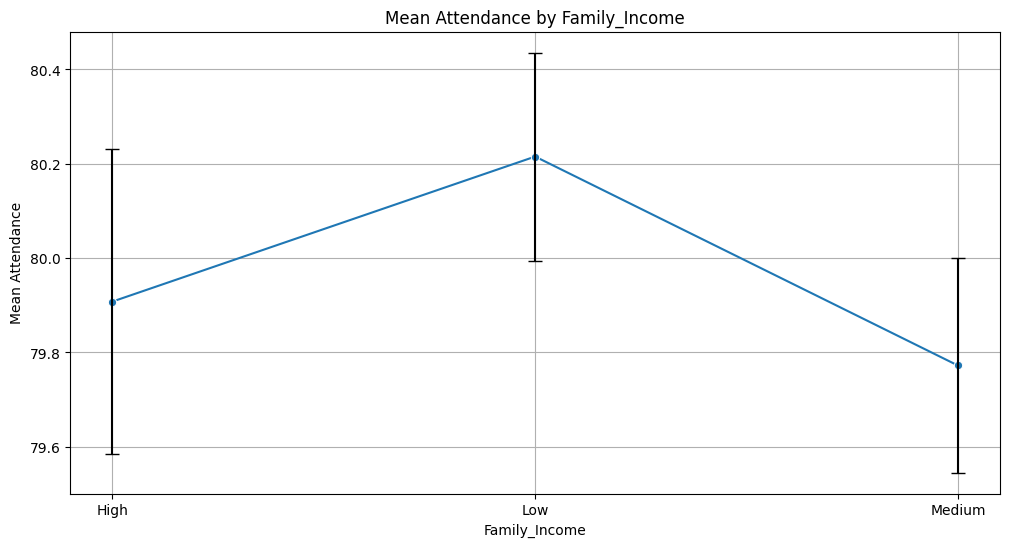

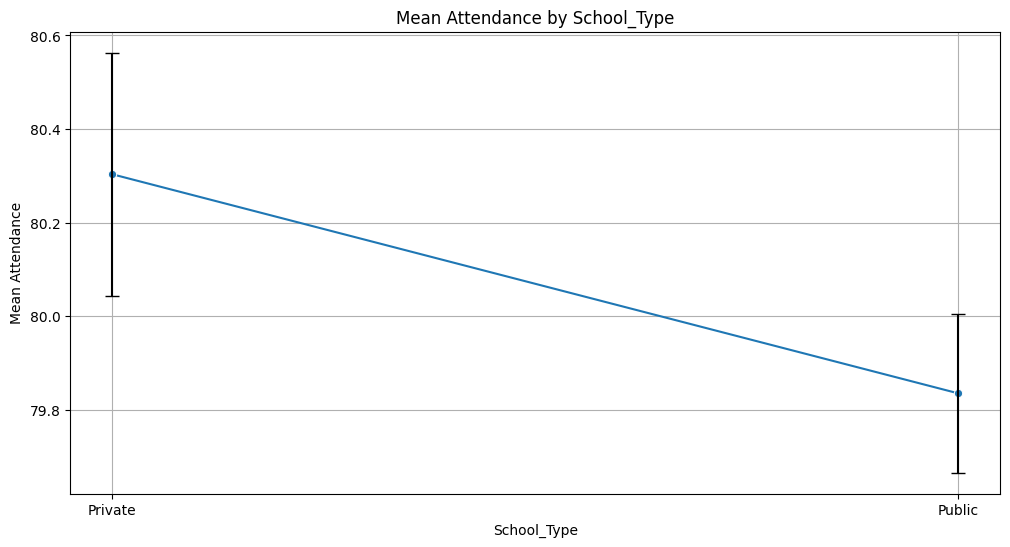

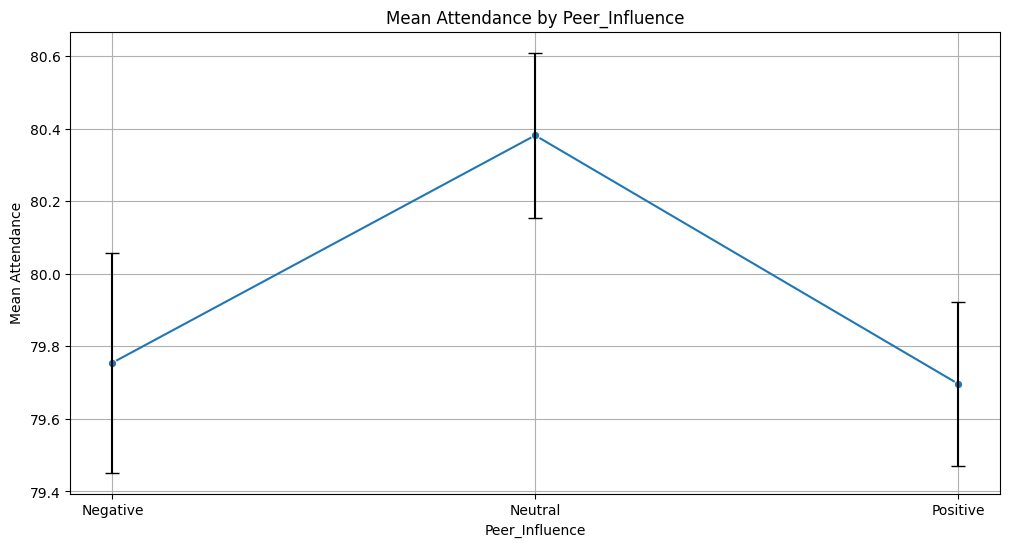

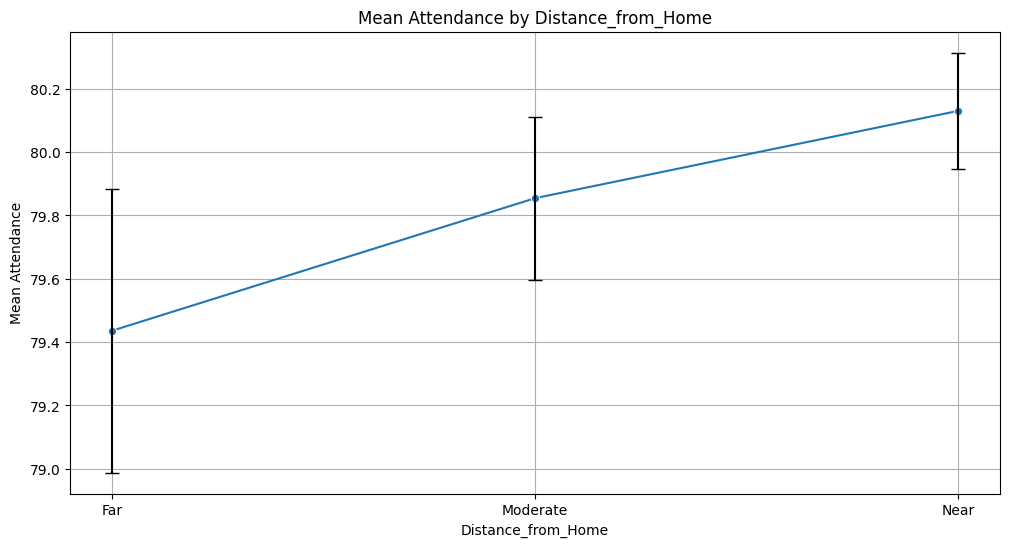

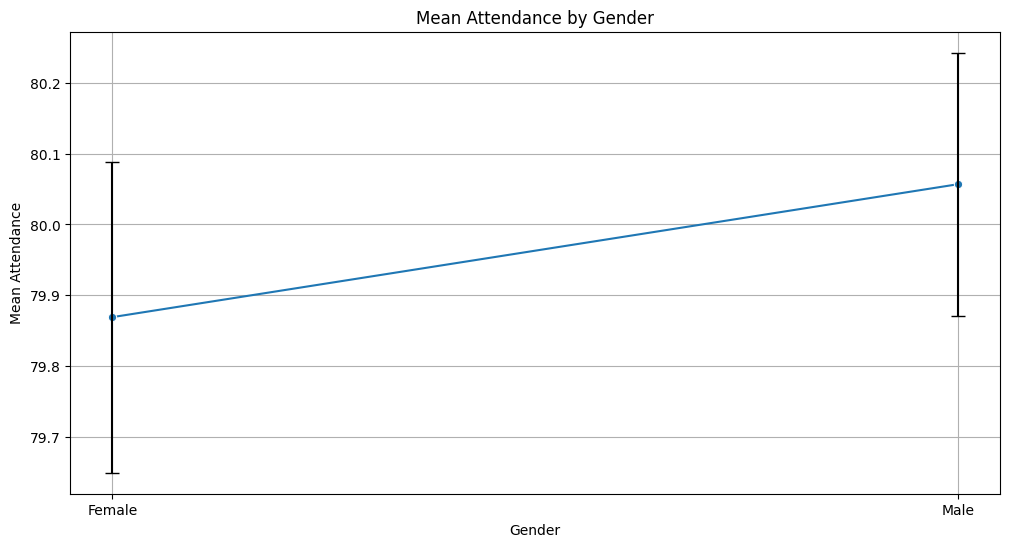

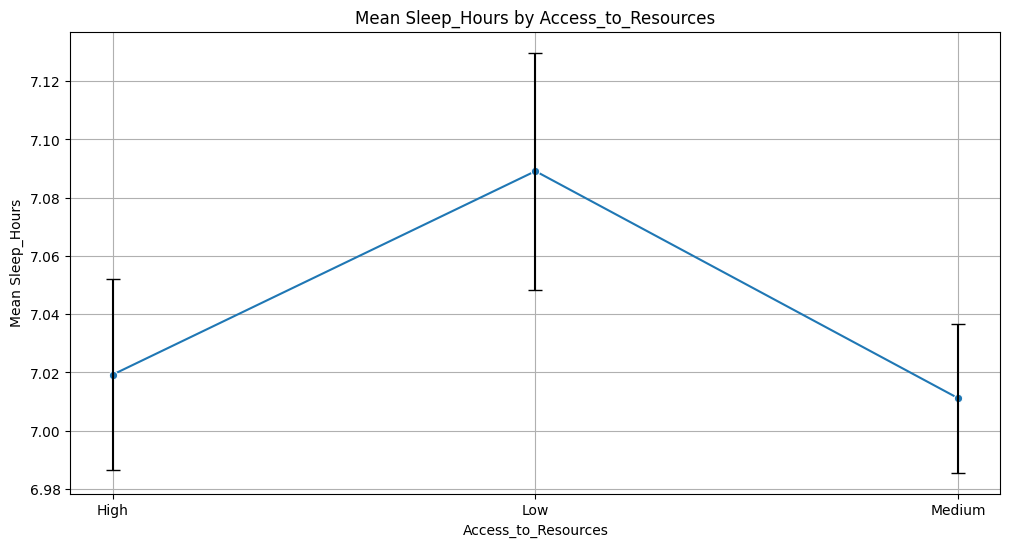

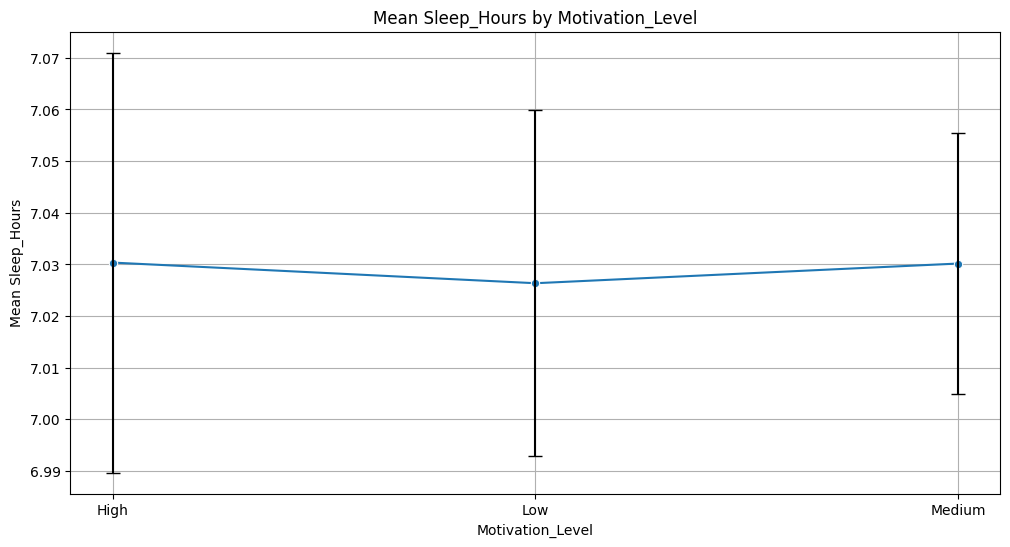

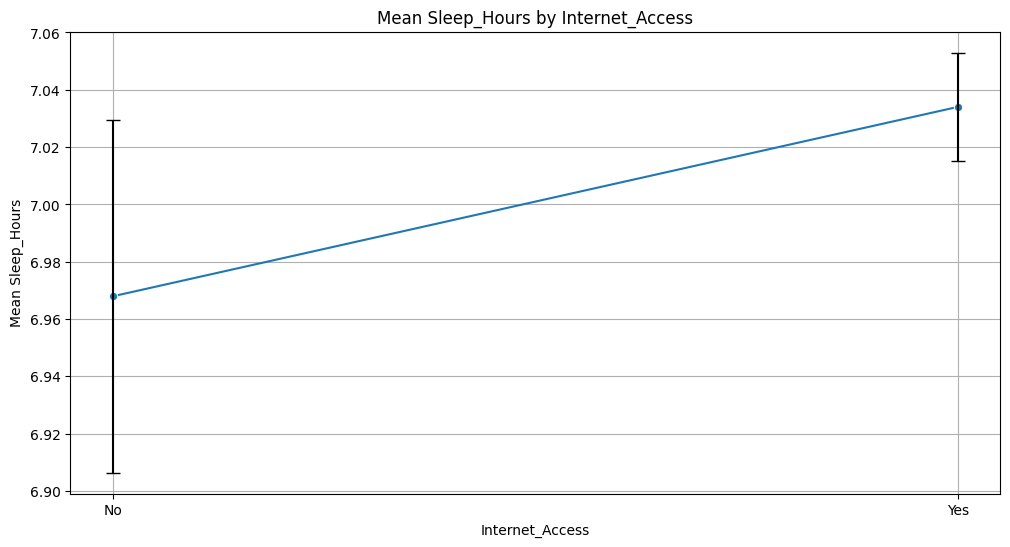

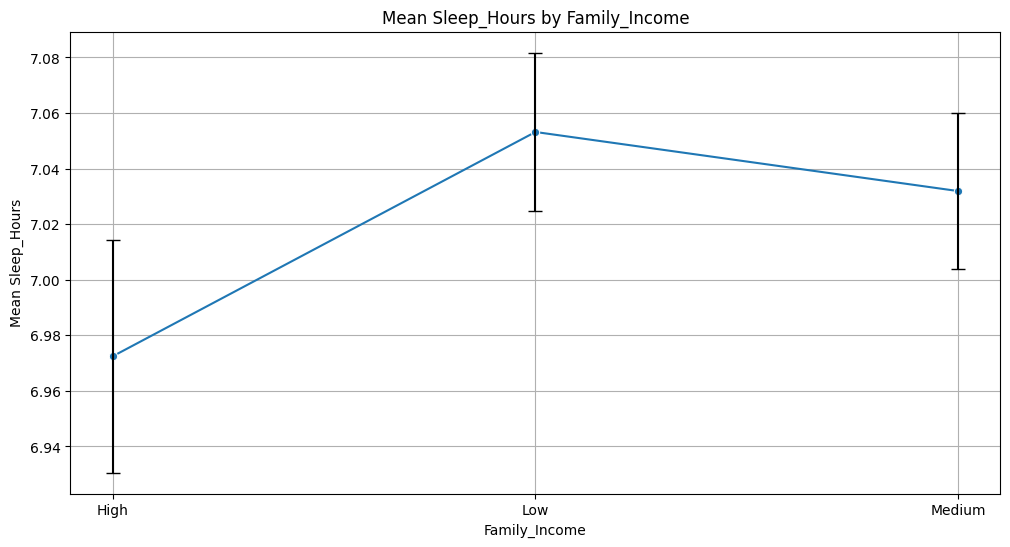

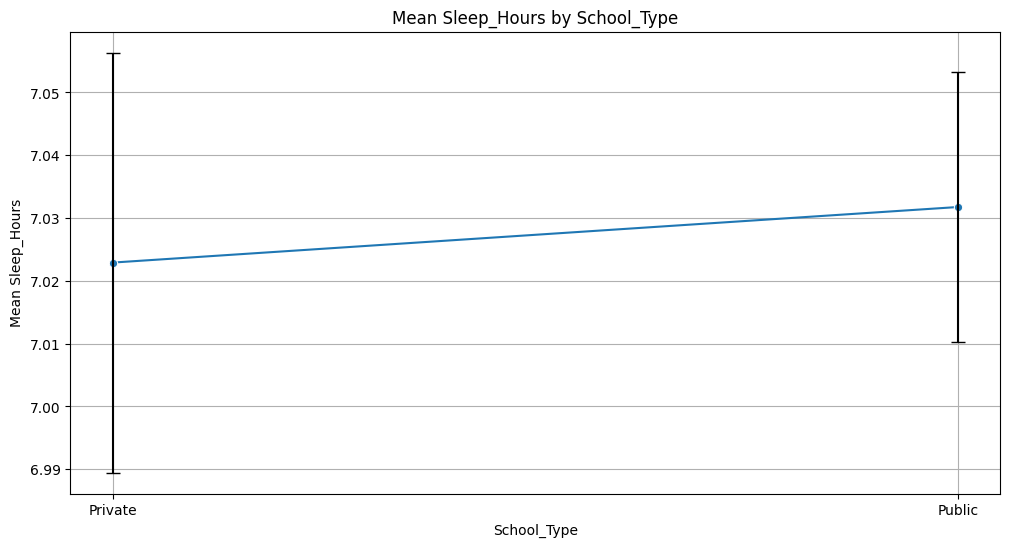

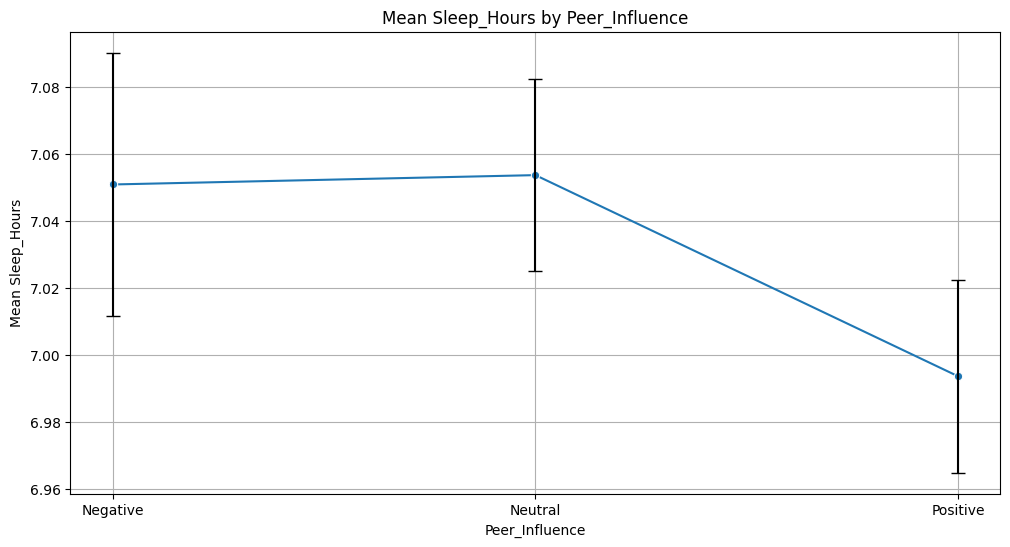

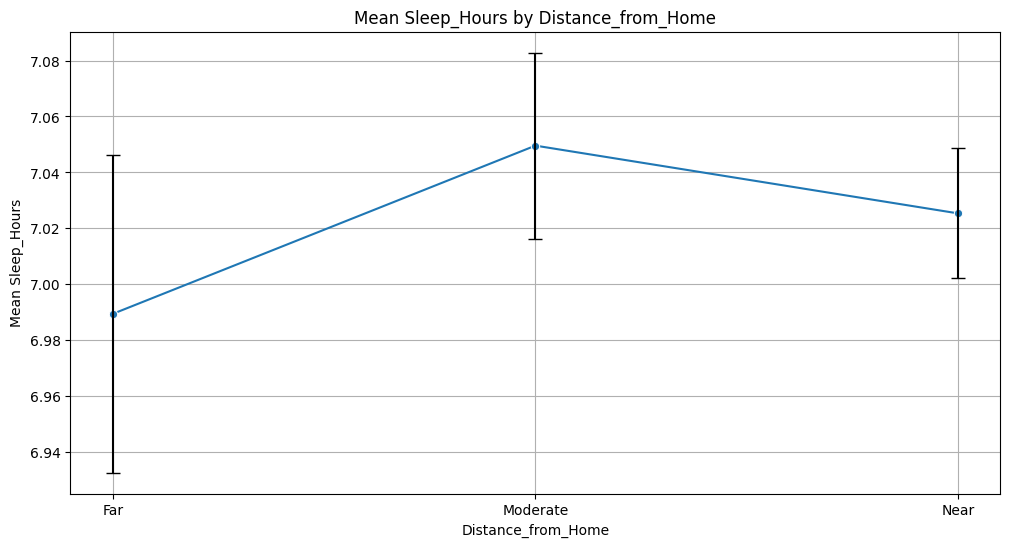

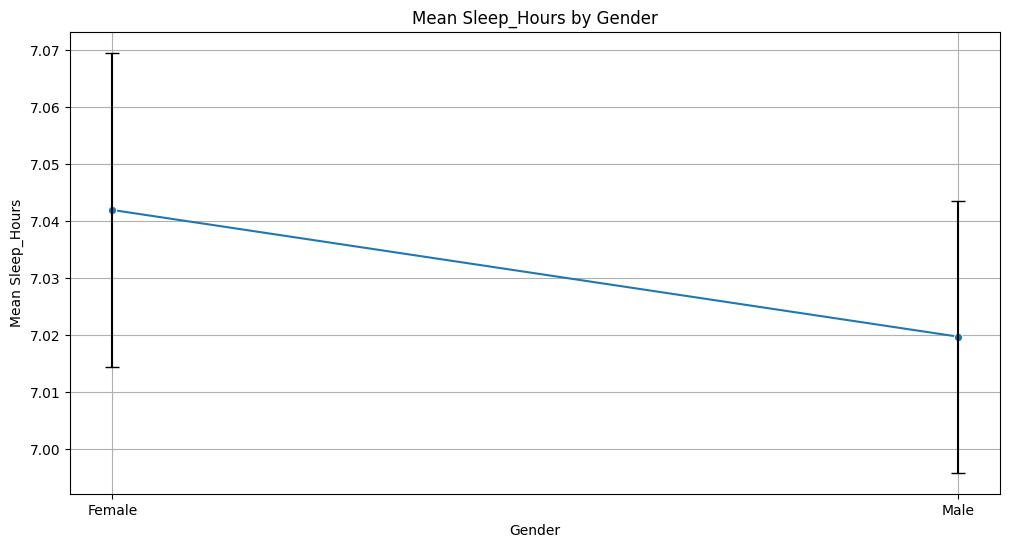

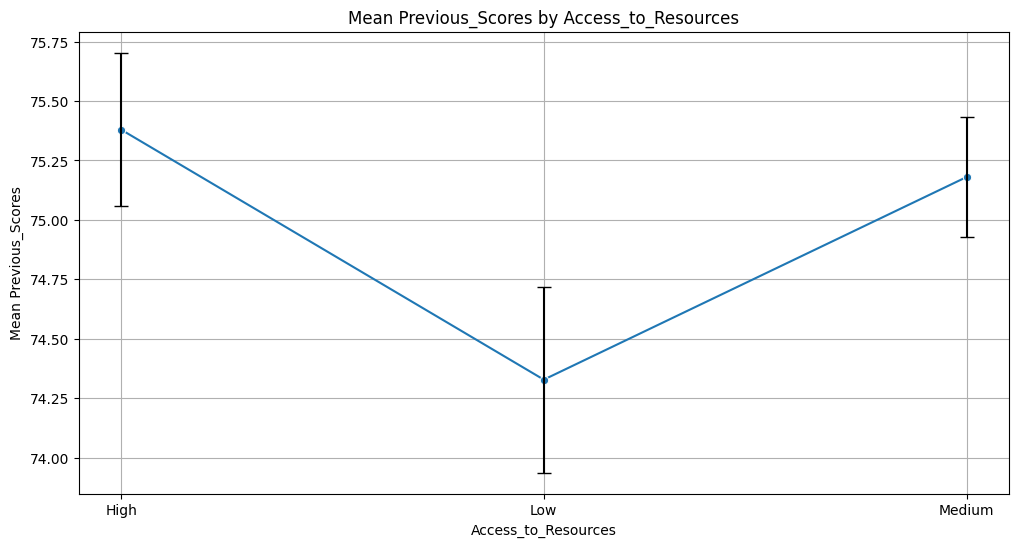

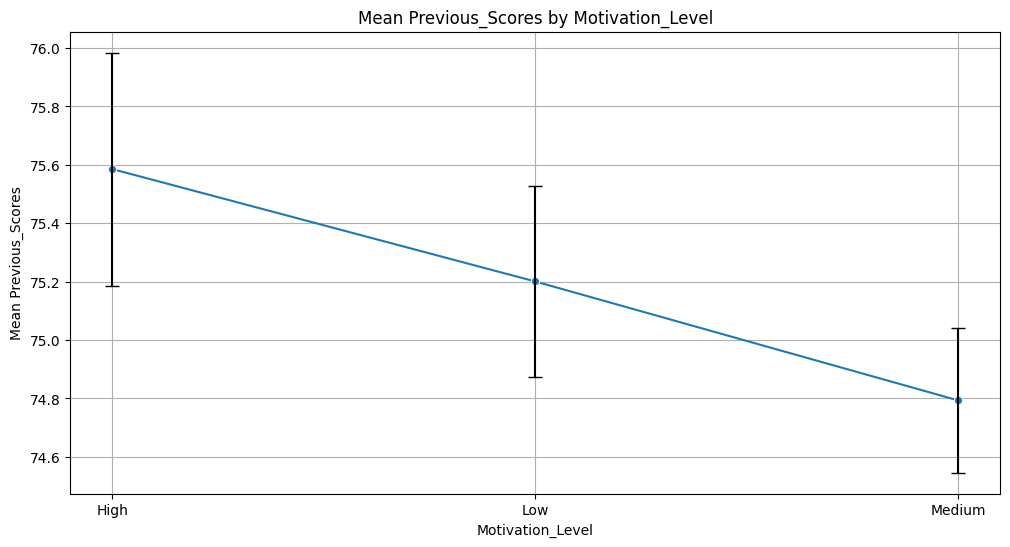

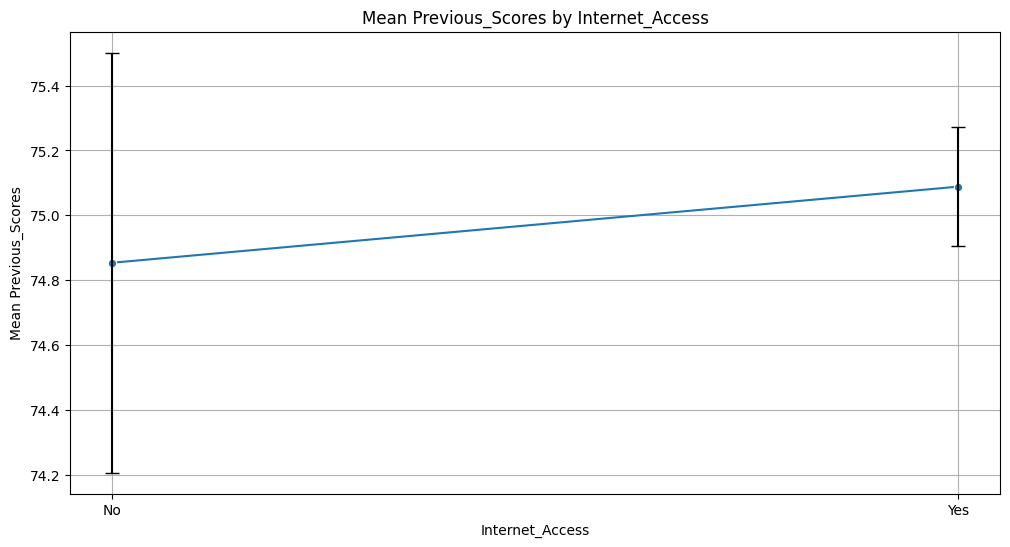

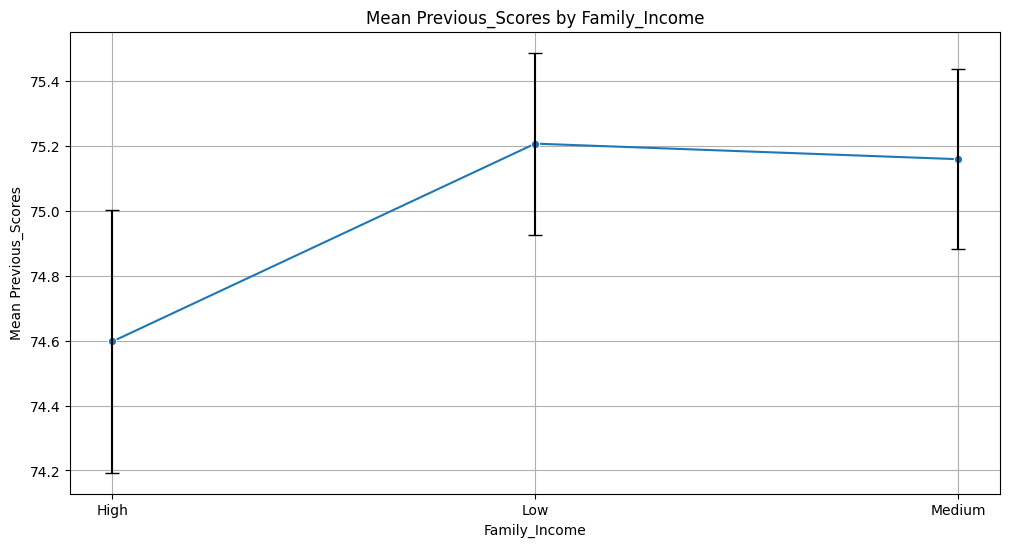

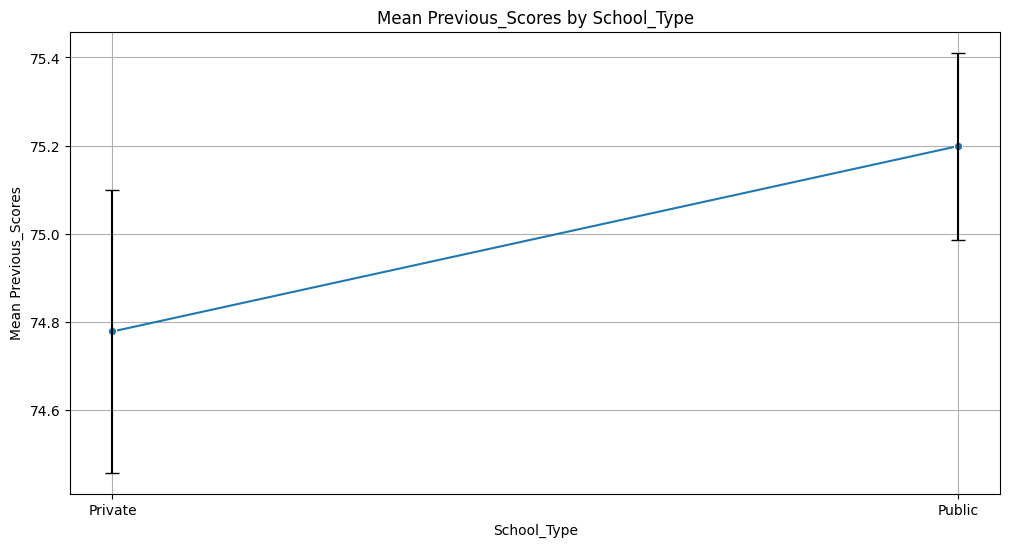

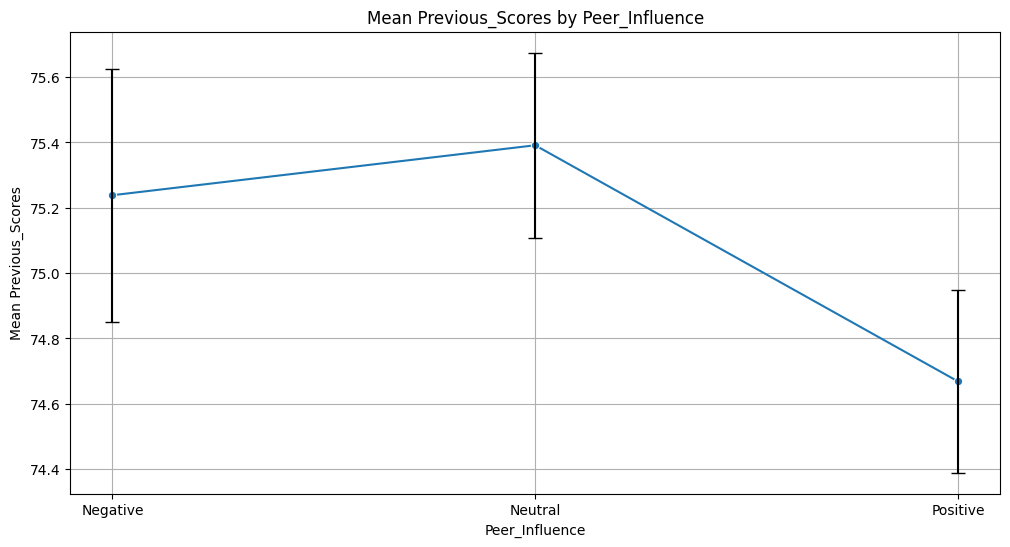

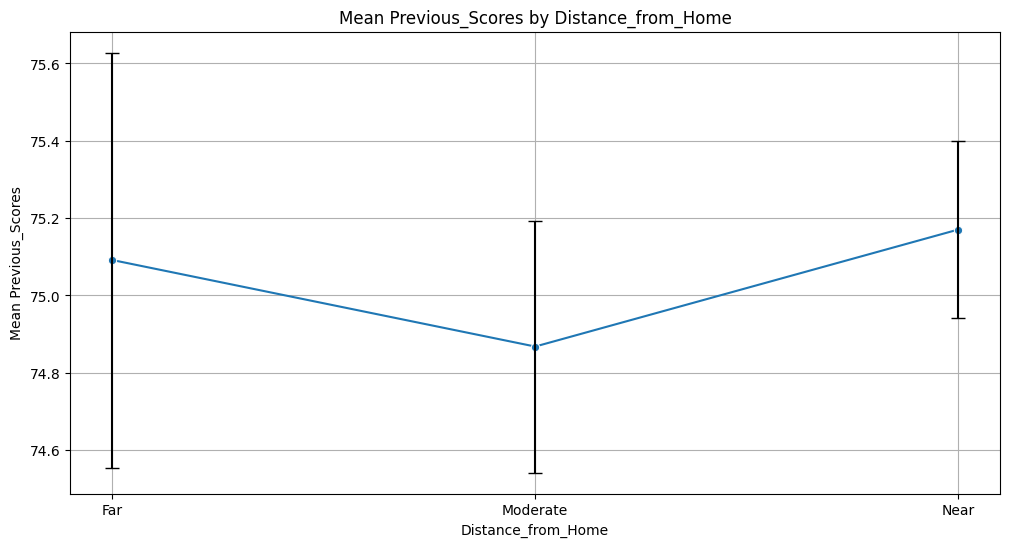

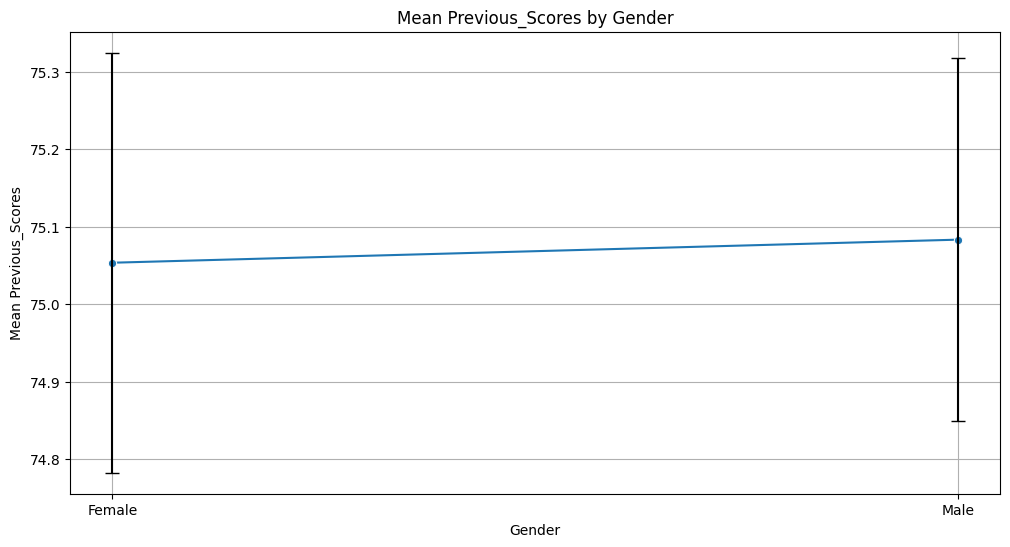

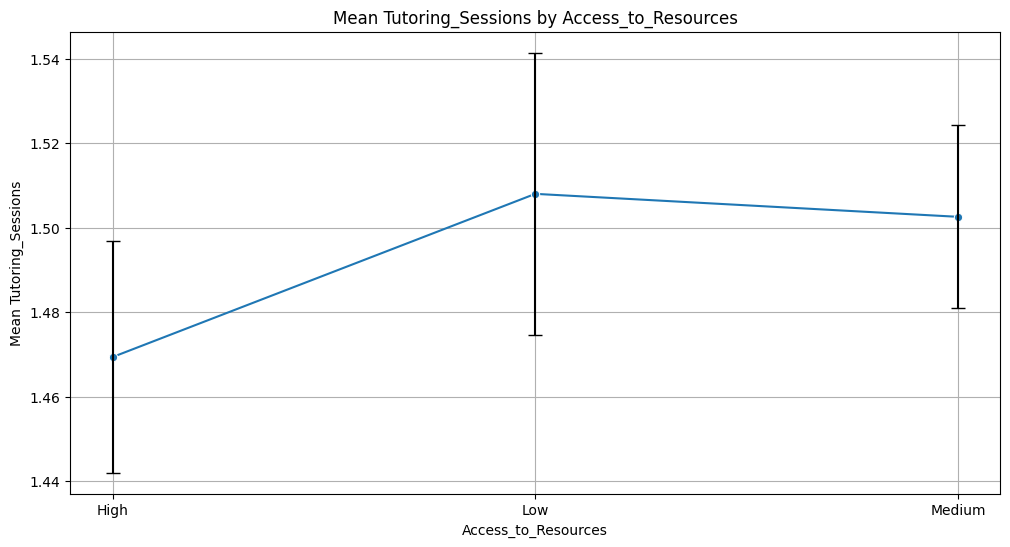

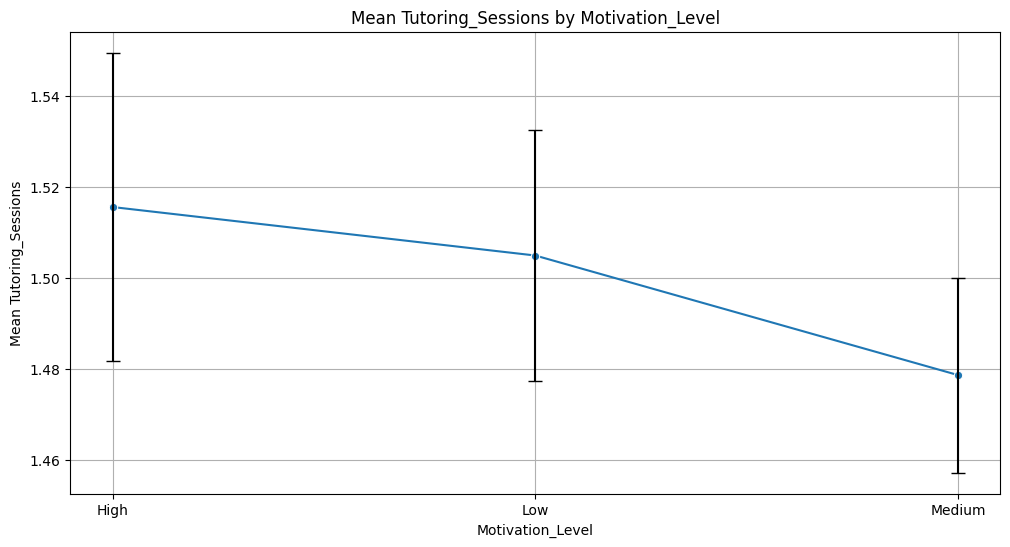

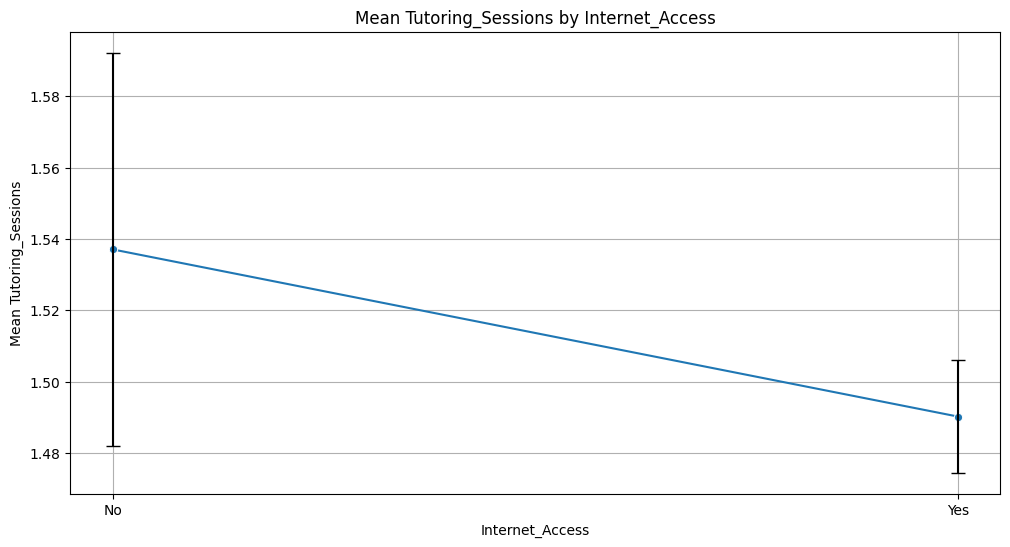

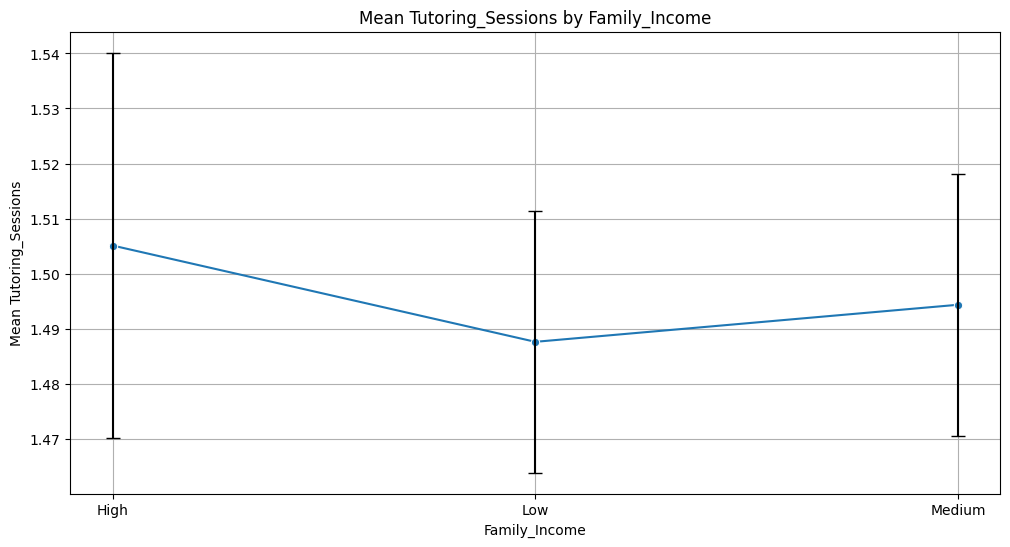

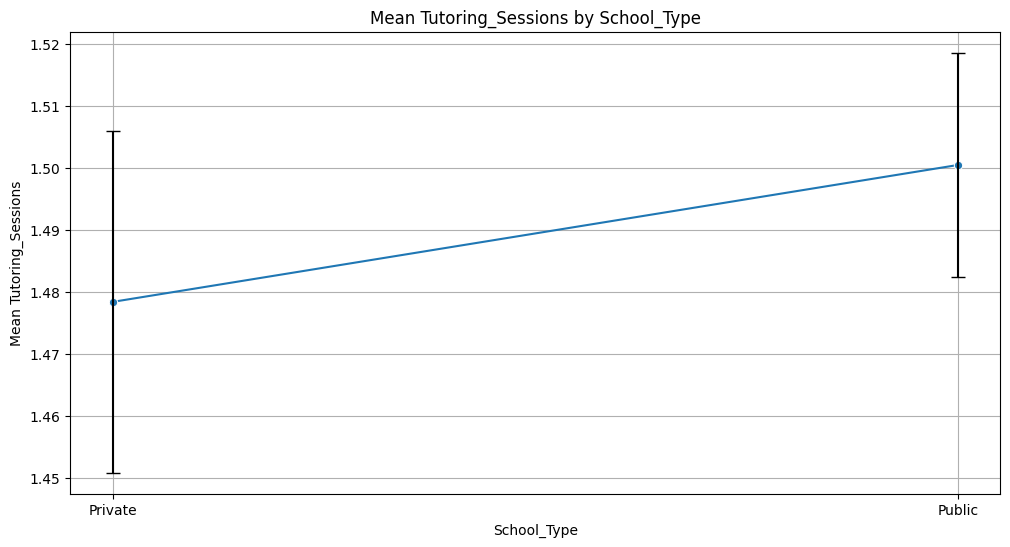

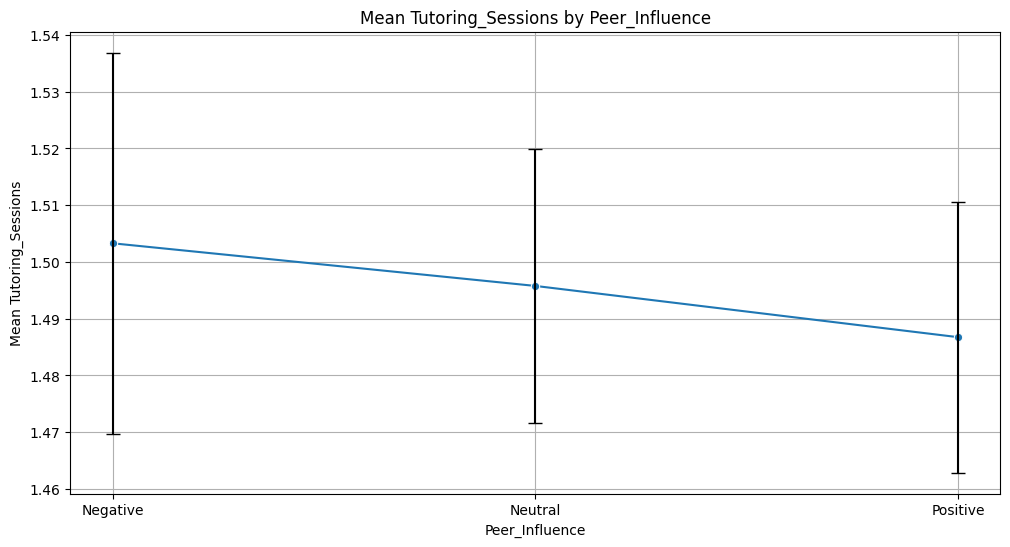

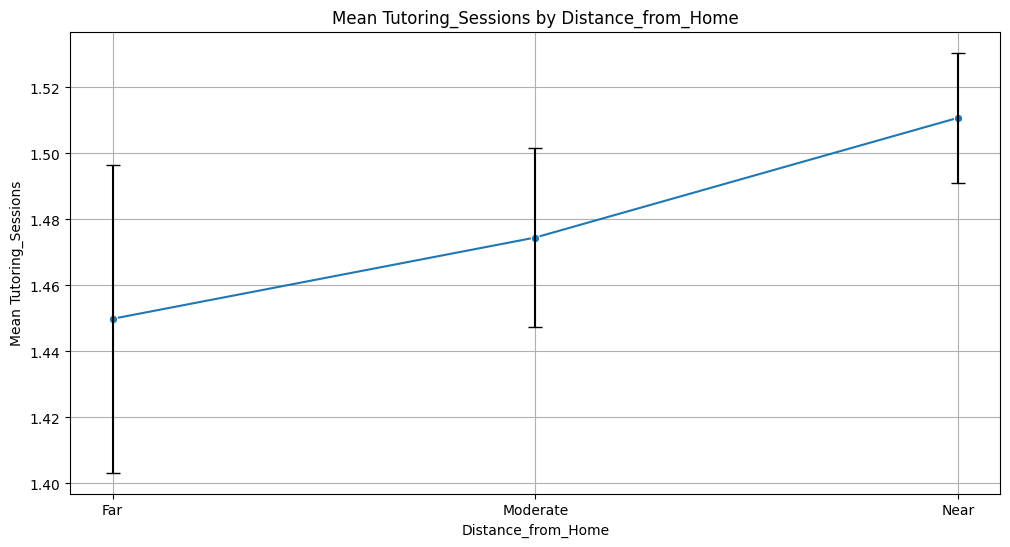

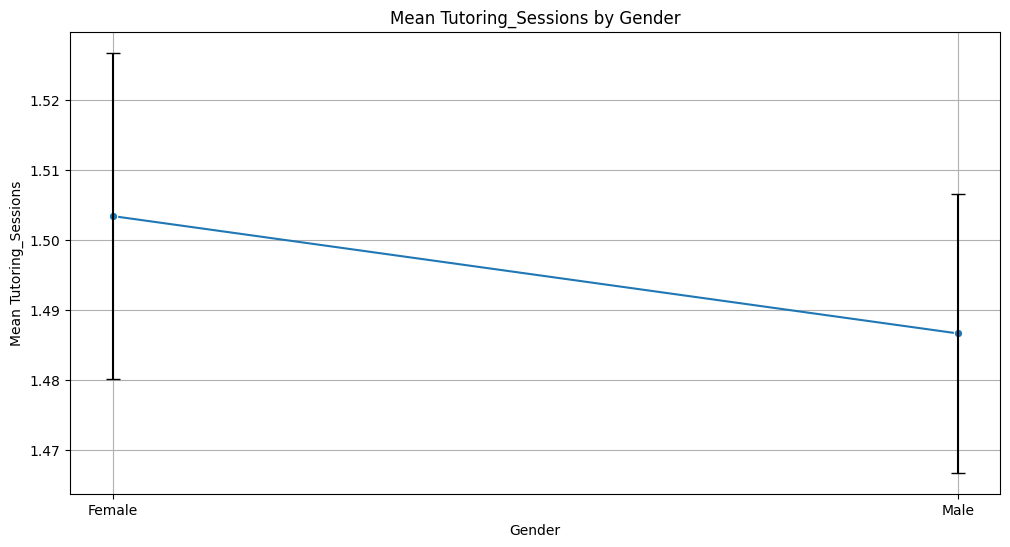

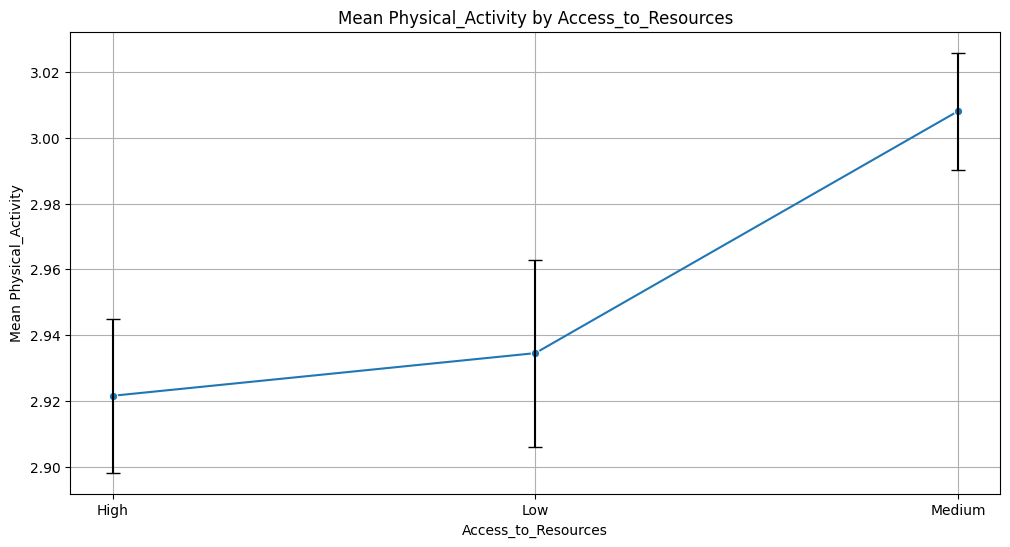

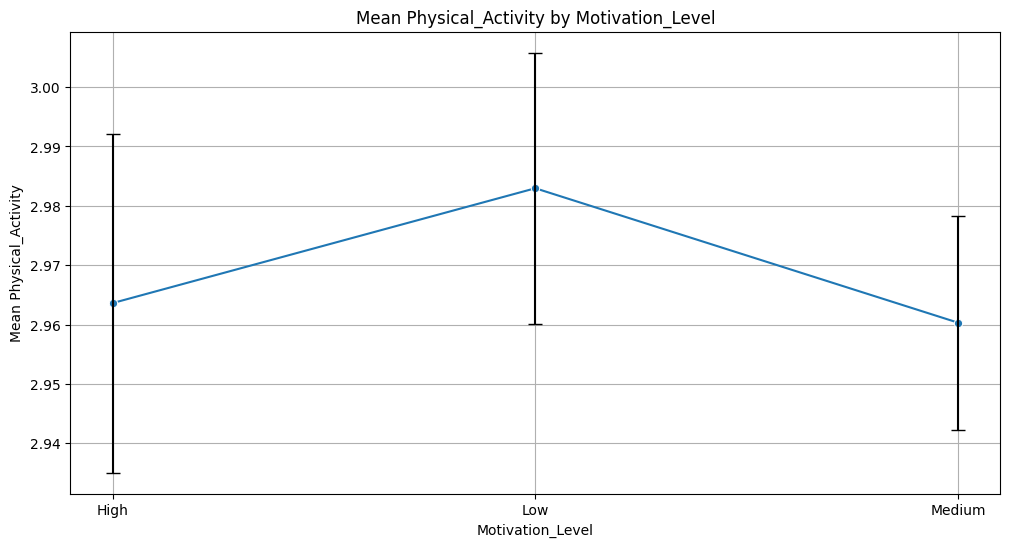

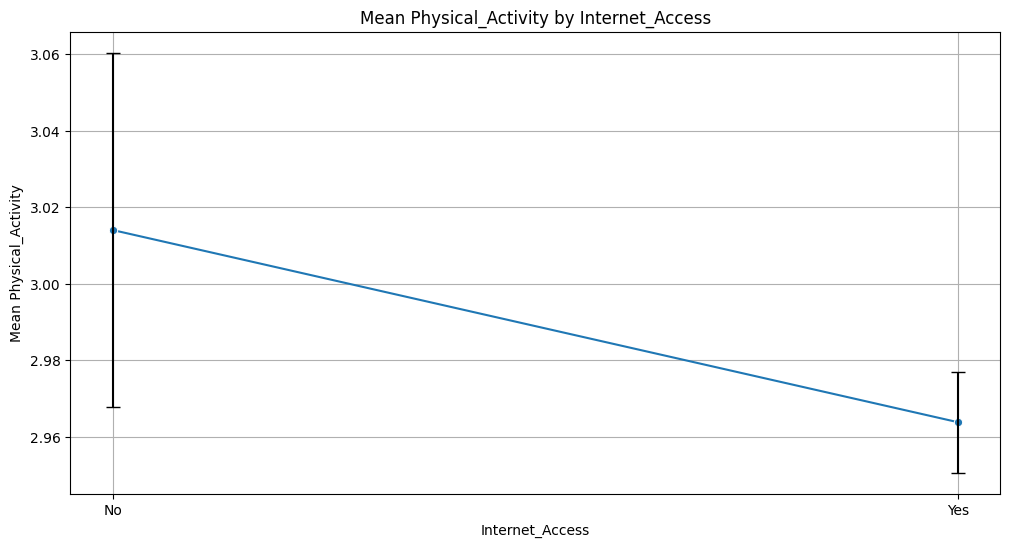

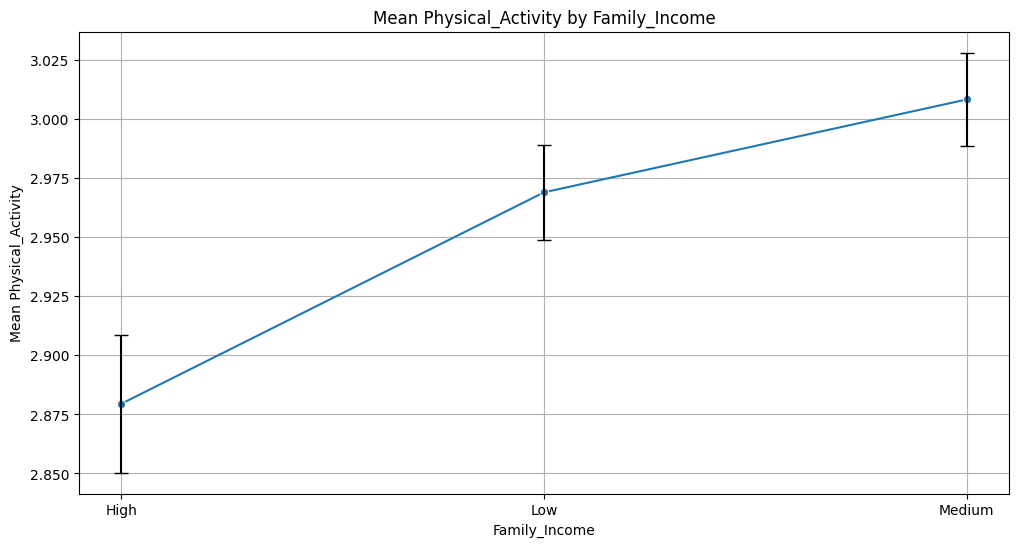

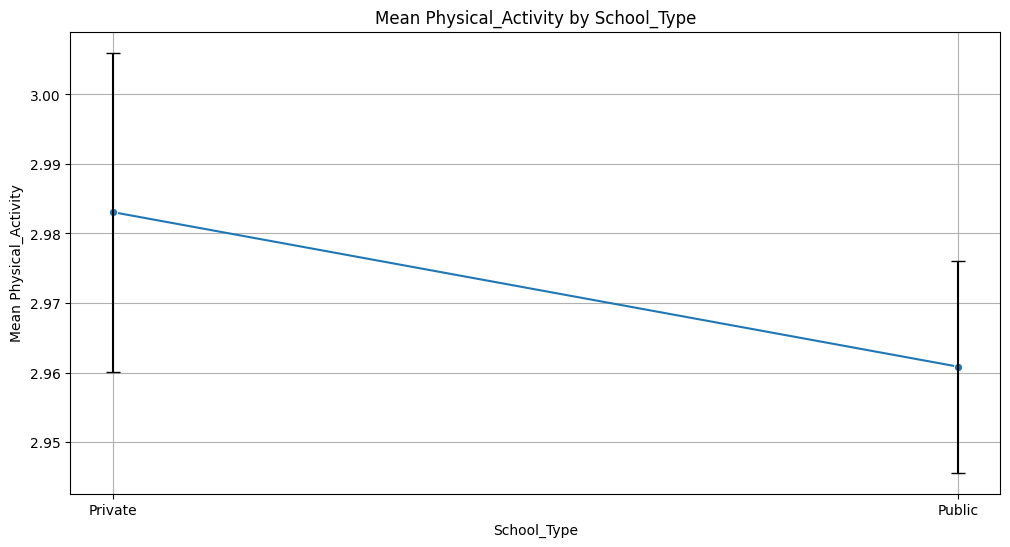

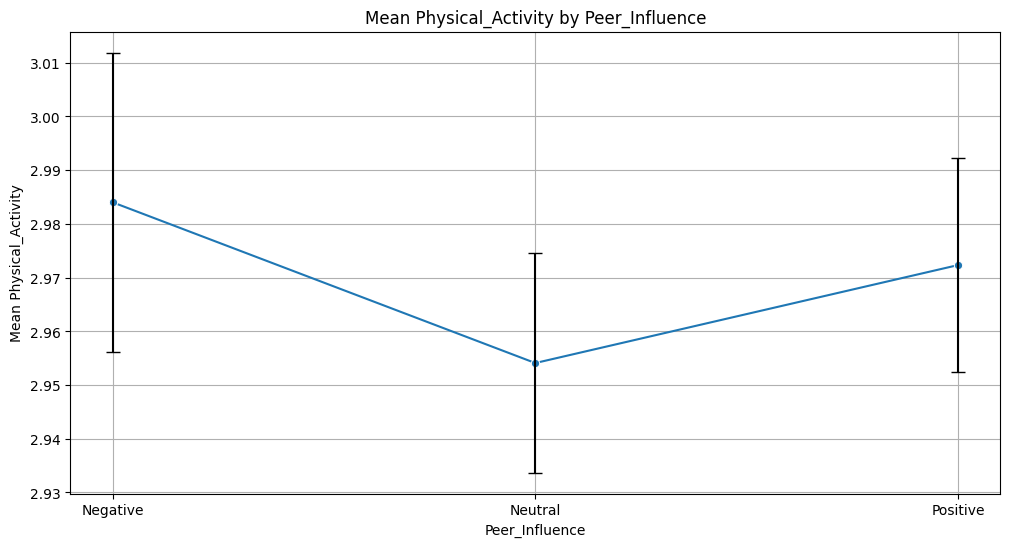

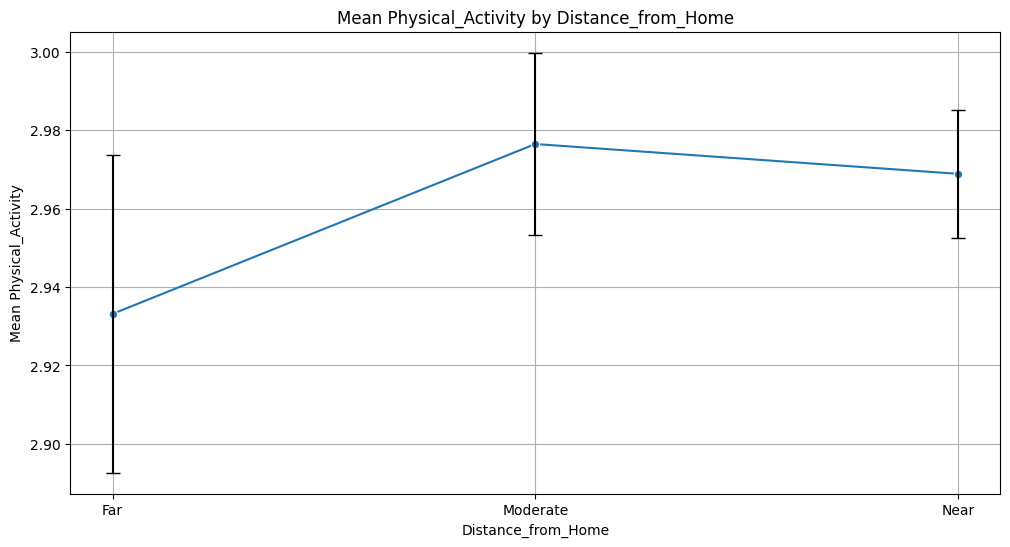

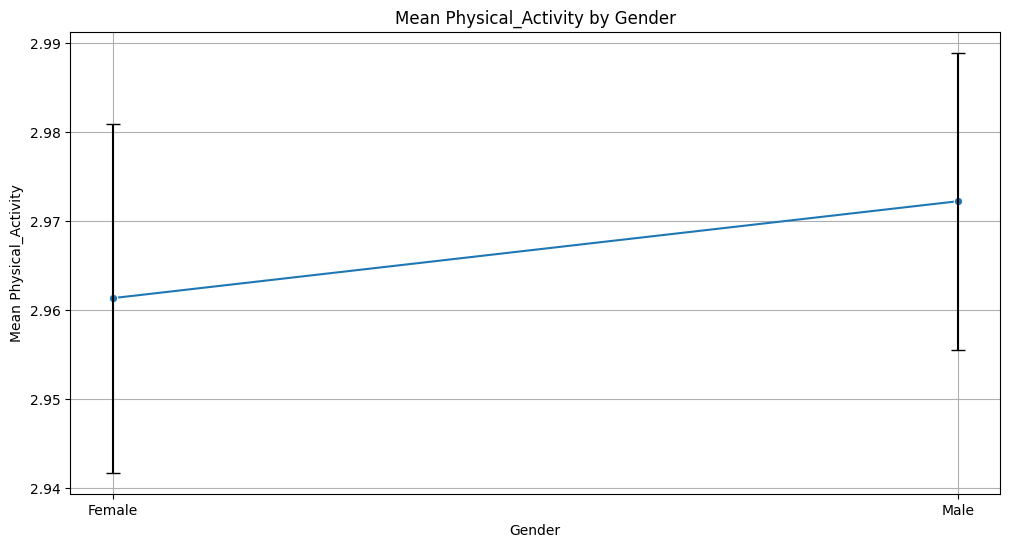

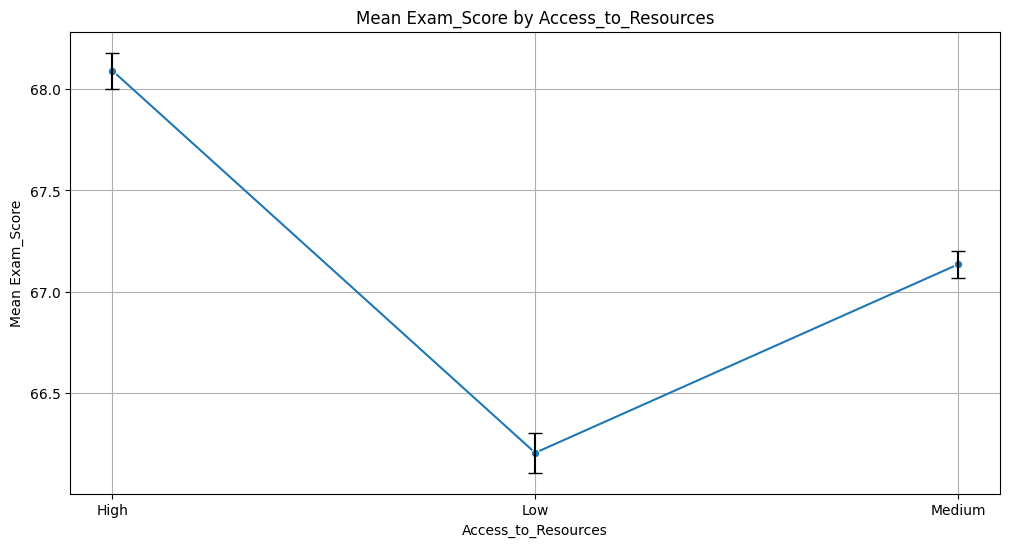

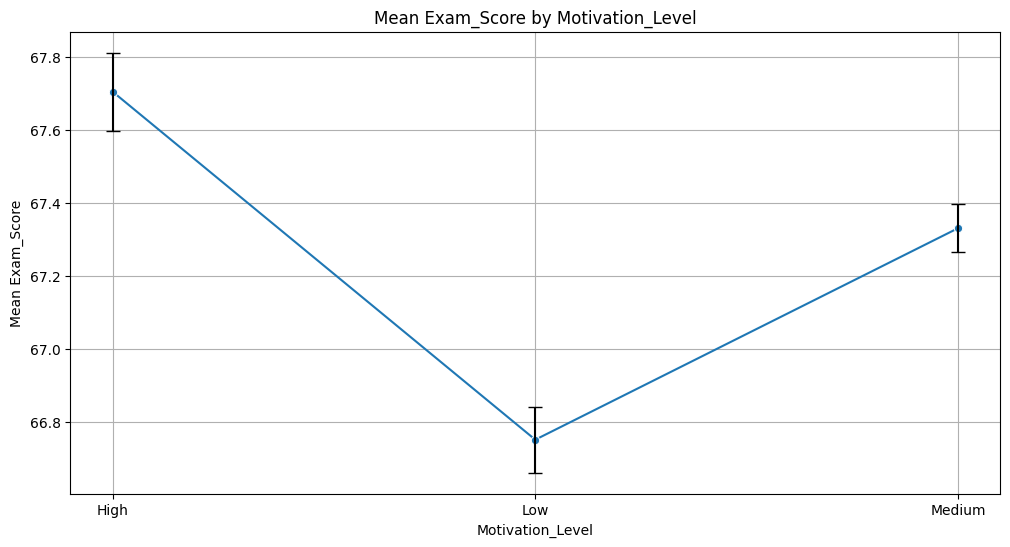

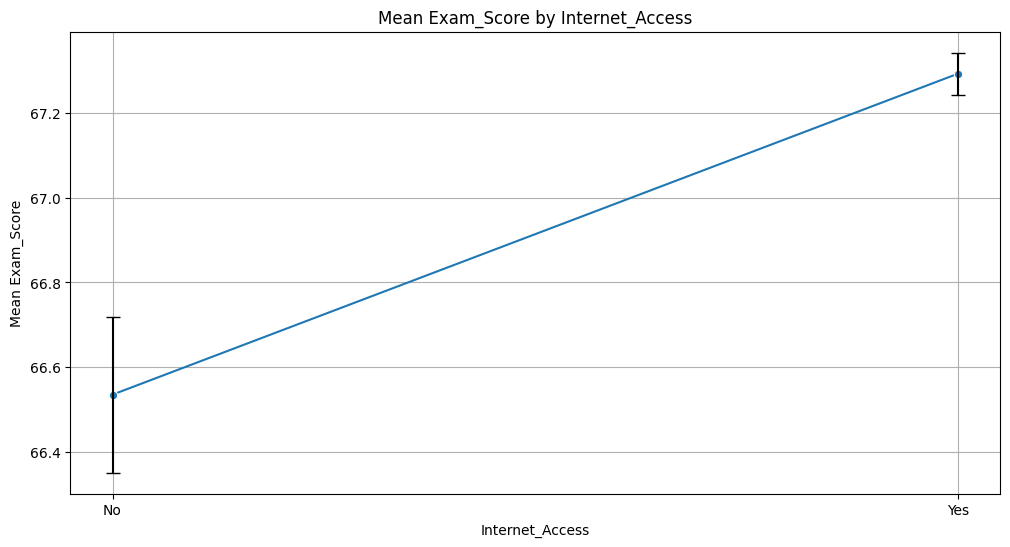

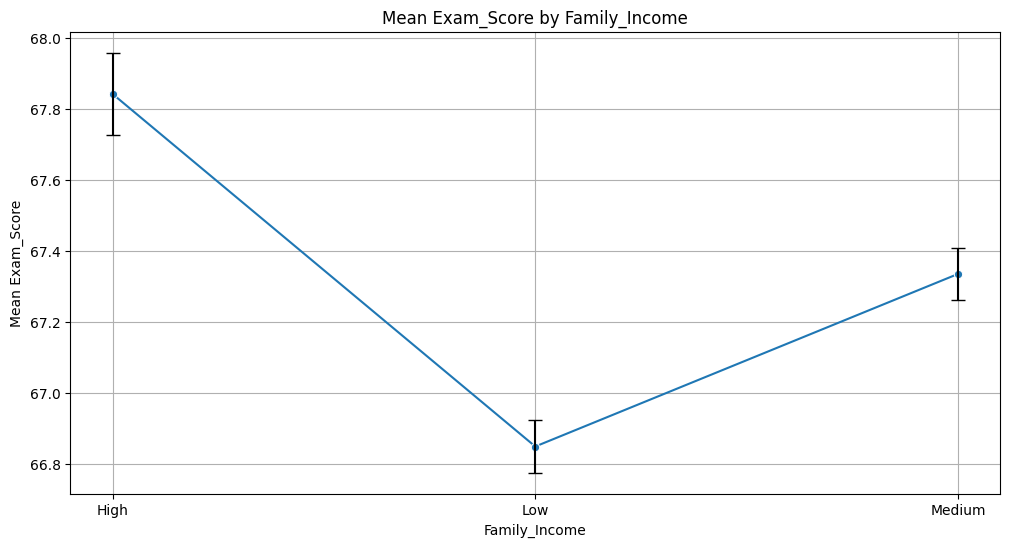

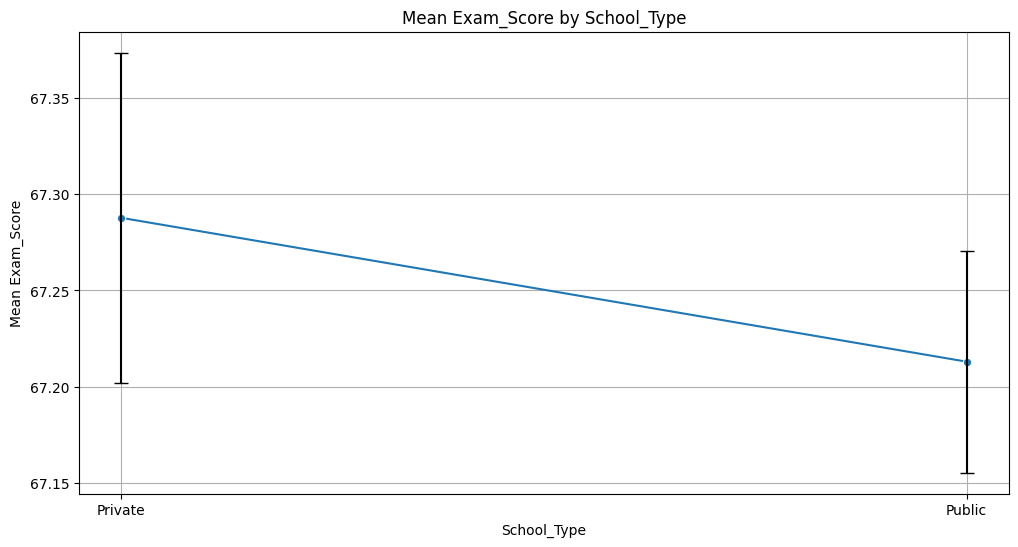

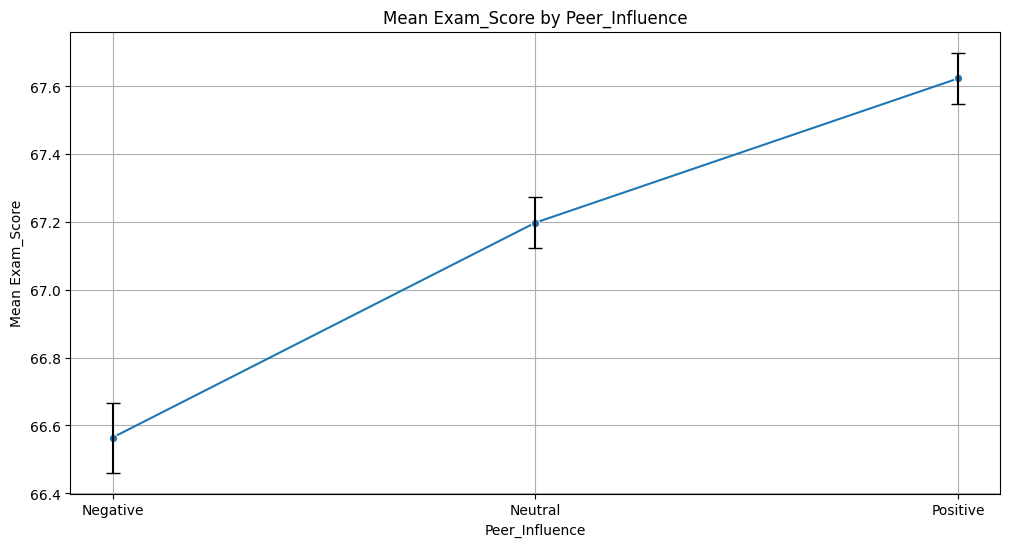

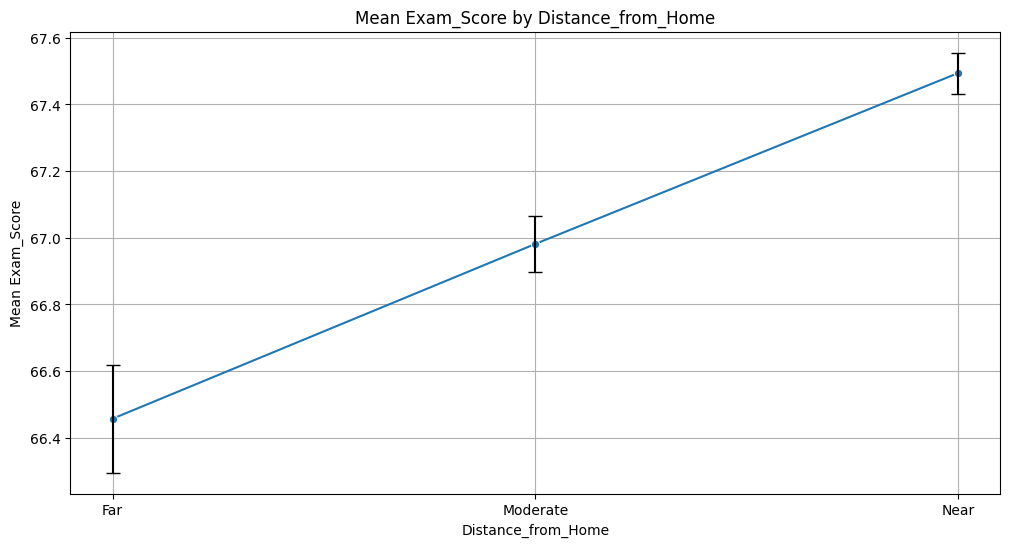

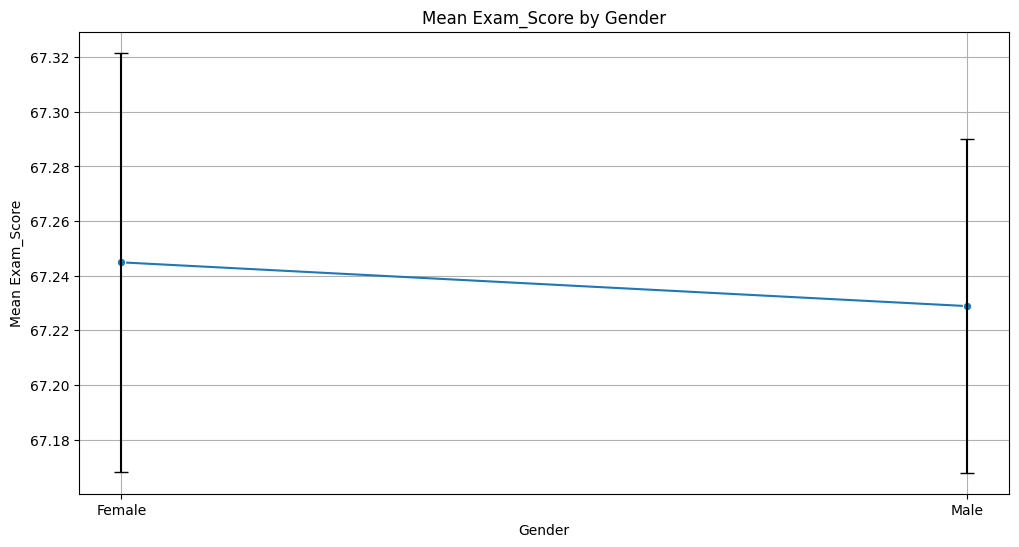

In [ ]:
for num_col, cat_col in product(num_cols, cat_cols):
    # Calculate mean and standard deviation for the numerical column based on categorical variable
    summary = data.groupby(cat_col).agg(
        mean_value=(num_col, 'mean'),
        std_value=(num_col, 'std'),
        count=(num_col, 'size')
    ).reset_index()

    # Calculate standard error for error bars
    summary['std_error'] = summary['std_value'] / summary['count']**0.5

    # Plotting line chart with error bars
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=summary, x=cat_col, y='mean_value', marker='o')

    # Add error bars
    plt.errorbar(x=summary[cat_col], 
                 y=summary['mean_value'], 
                 yerr=summary['std_error'], 
                 fmt='none', 
                 c='black', 
                 capsize=5)

    # Adding titles and labels
    plt.title(f'Mean {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(f'Mean {num_col}')
    plt.grid()

    # Show the plot
    plt.show()

In [ ]:
# Constants
SAMPLE_SIZE_THRESHOLD = 30
SIGNIFICANCE_LEVEL = 0.05

# Assuming you have two lists: cat_cols (categorical) and num_cols (numerical)
# Replace `data` with your actual DataFrame
for cat_col, num_col in product(cat_cols, num_cols):
    # Drop any rows with missing values for the current pair of columns
    filtered_data = data[[cat_col, num_col]].dropna()

    # Group numerical data by the categorical column
    groups = filtered_data.groupby(cat_col)[num_col]

    # Get unique categories
    unique_categories = filtered_data[cat_col].unique()

    # Skip if there's only one category (nothing to compare)
    if len(unique_categories) < 2:
        print(f"Skipping {cat_col} - {num_col}: Less than two categories")
        continue

    # Handle binary categorical columns (T-test)
    if len(unique_categories) == 2:
        group1 = groups.get_group(unique_categories[0])
        group2 = groups.get_group(unique_categories[1])

        # Check which test to perform based on sample size
        if len(group1) > SAMPLE_SIZE_THRESHOLD and len(group2) > SAMPLE_SIZE_THRESHOLD:
            # Perform Z-test approximation using T-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "Z-test (T-test approximation)"
        else:
            # Perform T-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "T-test"
        
        # Print results
        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        # Significance test
        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")

    # Handle categorical columns with more than 2 categories (ANOVA)
    else:
        # Create a list of numerical data for each category
        category_data = [group for _, group in groups]

        # Perform one-way ANOVA
        stat, p_value = stats.f_oneway(*category_data)
        test_type = "ANOVA"

        # Print results
        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        # Significance test
        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")

    print("\n")

ANOVA between Access_to_Resources and Hours_Studied:
Statistic: 0.6265, p-value: 0.5345
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between Access_to_Resources and Attendance:
Statistic: 0.5594, p-value: 0.5716
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between Access_to_Resources and Sleep_Hours:
Statistic: 1.3897, p-value: 0.2492
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between Access_to_Resources and Previous_Scores:
Statistic: 2.2969, p-value: 0.1007
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between Access_to_Resources and Tutoring_Sessions:
Statistic: 0.5607, p-value: 0.5708
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between Access_to_Resources and Physical_Activity:
Statistic: 5.2188, p-value: 0.0054
Reject the null hypothesis (p-value < 0.05)


ANOVA between Access_to_Resources and Exam_Score:
Statistic: 98.0044, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between 

### CONCLUSIONS :

#### 1) Students with reliable internet access could perform better due to enhanced access to study materials and online resources, suggesting that internet access is a critical factor in educational performance.
#### 2) Previous exam-score do not highly affect upcoming exam scores . Therefore , there is always a scope of improvement .
#### 3) Availabilty of Internet is also an important factor in consideration of educational performance.